## Table of Contents

**1- Loading all nedeed packages**

**2- Downloading the protein expression and clinical data from TCGA**

**3- TCGA protein gene annotation to get the genes**

**3- Check and handling of missing values in exp data or target columns in meta data**

**4- Exploration of meta data promising features**

**5- Data cleaning**

**6- Visualize the data using Kmeans clustering**

**6- Differential Analysis between non_metastatic M0 and M1 metastatic using limma**

**7- Save the protein expression cleaned data and DE protein expression data**


### 1- Loading all nedeed packages

In [1]:
library(magrittr)
library(ggplot2)
library(ggrepel)
library(tidyverse)
library(limma)
library(vegan)
library(cluster)
library(factoextra)
library(gridExtra)
library(PerformanceAnalytics)
library(corrplot)
library(Hmisc)
library(RColorBrewer)
library(impute)
library(pathview)
library(glmnet)
library(SummarizedExperiment)
library(TCGAbiolinks)
library(ggfortify)
library(ComplexHeatmap)
library(edgeR)
library(dplyr)
library(corrplot)
library(EnhancedVolcano)
library(ggvenn)
library(umap)
library(TCGAbiolinks)


Warning message:
"package 'ggplot2' was built under R version 4.3.1"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'vegan' was built under R version 4.3.1"
Loading required package: permute

Warning message:
"package 'permute' was built under R version 4.3.1"
Loading required package: lattice

This is vegan 2.6-4

Warning message:
"package 'factoextra' was built under R version 4.3.1"
Welcome! Want to learn more? 

The following object is masked from 'package:MatrixGenerics':

    rowMedians


The following objects are masked from 'package:matrixStats':

    anyMissing, rowMedians


The following object is masked from 'package:Hmisc':

    contents


Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Warning message:
"package 'ggv

### 2- Downloading the protein expression and clinical data from TCGA

In [45]:
# download prtein expression of KIRC project from TCGA using TCGAbiolinks query
query.rppa <- GDCquery(
    project = "TCGA-KIRC", 
    data.category = "Proteome Profiling",
    data.type = "Protein Expression Quantification"
)
GDCdownload(query.rppa) 
rppa <- GDCprepare(query.rppa)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-KIRC

--------------------

oo Filtering results

--------------------

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



|====================================================|100%                      Completed after 14 s 


Some files have a  different number of proteins, we will introduce NA for the missing values



In [46]:
rppa

AGID,lab_id,catalog_number,set_id,peptide_target,TCGA-CJ-4903-01A,TCGA-CZ-5986-01A,TCGA-B0-4813-01A,TCGA-B8-A54D-01A,TCGA-BP-4991-01A,⋯,TCGA-B0-4703-01A,TCGA-B8-5162-01A,TCGA-BP-4965-01A,TCGA-BP-5007-01A,TCGA-CJ-4888-01A,TCGA-CW-5591-01A,TCGA-B0-4700-01A,TCGA-A3-3351-01A,TCGA-CJ-5672-01A,TCGA-AK-3451-01A
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AGID00100,882,sc-628,Old,1433BETA,0.025505000,-0.0139150,0.0400650,0.0833900,-0.0101330,⋯,0.007130500,0.18592000,0.00135860,-0.026811,2.30640000,-0.01539500,0.066567,0.0026568,0.00620150,0.0018811
AGID00111,913,sc-23957,Old,1433EPSILON,0.023668000,-0.0083428,-0.0011894,-0.0509670,0.0339610,⋯,0.006562400,0.14762000,0.05699800,0.024080,-0.03918500,-0.11941000,-0.031339,0.0340550,0.07890300,0.0944770
AGID00101,883,sc-1019,Old,1433ZETA,-0.556580000,-0.6227200,-0.5614300,-0.7129800,0.0681790,⋯,-0.030213000,-0.41313000,-0.39479000,-0.087971,-0.50853000,0.01205600,-0.153910,-0.1742500,-0.38464000,-0.2664600
AGID00001,2,9452,Old,4EBP1,-0.344640000,-0.1946700,-0.1035400,-0.3157200,-0.0690520,⋯,-0.283730000,-0.33034000,-0.56304000,-0.038585,-0.11269000,0.37210000,0.061987,-0.3378200,-0.68907000,-0.7790300
AGID00002,3,9456,Old,4EBP1_pS65,-0.133980000,0.2524800,-0.1003200,0.2389400,-0.2940000,⋯,-0.000895060,-0.33682000,0.06429600,-0.377590,-0.25091000,-0.41787000,-0.325330,-0.2818400,-0.12584000,0.0427940
AGID00003,6,9459,Old,4EBP1_pT37T46,-0.789750000,0.1421800,1.1571000,-0.4789200,0.2091400,⋯,-0.117110000,0.22770000,-0.65377000,-0.190980,0.59417000,0.06638200,0.528210,-0.4397600,-0.95287000,-0.6658400
AGID00443,8,9455,Old,4EBP1_pT70,-0.083370000,0.4066500,0.0166610,0.1271400,-0.0764470,⋯,-0.039552000,0.08298100,-0.16688000,-0.053480,-0.09681300,-0.11692000,0.068284,-0.1521500,-0.12052000,-0.0752010
AGID00120,985,4937,Old,53BP1,-0.901100000,-0.4446800,-0.9210600,-0.9386800,-1.5288000,⋯,-0.317950000,-0.86367000,-1.20250000,-1.299300,-0.39367000,-0.77784000,-0.817010,-0.4187900,-0.73936000,-1.0254000
AGID00004,13,3661,Old,ACC_pS79,-1.234600000,-1.1300000,-0.3510400,-1.6838000,-1.4859000,⋯,-1.103300000,-1.32730000,-1.29970000,-1.401300,-0.85741000,-0.82290000,-1.155100,-1.0141000,-1.11800000,-1.1175000


In [56]:
# save protein expression data
write.csv(rppa, "protein_kirc_all.csv")

In [2]:
# read the saved protein expression data
prot_exp = read.csv('protein_kirc_all.csv',check.names=F,row.names=1)
dim(prot_exp)
head(prot_exp)

[1] 487 483

,AGID,lab_id,catalog_number,set_id,peptide_target,TCGA-CJ-4903-01A,TCGA-CZ-5986-01A,TCGA-B0-4813-01A,TCGA-B8-A54D-01A,TCGA-BP-4991-01A,⋯,TCGA-B0-4703-01A,TCGA-B8-5162-01A,TCGA-BP-4965-01A,TCGA-BP-5007-01A,TCGA-CJ-4888-01A,TCGA-CW-5591-01A,TCGA-B0-4700-01A,TCGA-A3-3351-01A,TCGA-CJ-5672-01A,TCGA-AK-3451-01A
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AGID00100,882,sc-628,Old,1433BETA,0.025505,-0.0139150,0.0400650,0.083390,-0.010133,⋯,0.00713050,0.18592,0.0013586,-0.026811,2.306400,-0.015395,0.066567,0.0026568,0.0062015,0.0018811
2,AGID00111,913,sc-23957,Old,1433EPSILON,0.023668,-0.0083428,-0.0011894,-0.050967,0.033961,⋯,0.00656240,0.14762,0.0569980,0.024080,-0.039185,-0.119410,-0.031339,0.0340550,0.0789030,0.0944770
3,AGID00101,883,sc-1019,Old,1433ZETA,-0.556580,-0.6227200,-0.5614300,-0.712980,0.068179,⋯,-0.03021300,-0.41313,-0.3947900,-0.087971,-0.508530,0.012056,-0.153910,-0.1742500,-0.3846400,-0.2664600
4,AGID00001,2,9452,Old,4EBP1,-0.344640,-0.1946700,-0.1035400,-0.315720,-0.069052,⋯,-0.28373000,-0.33034,-0.5630400,-0.038585,-0.112690,0.372100,0.061987,-0.3378200,-0.6890700,-0.7790300
5,AGID00002,3,9456,Old,4EBP1_pS65,-0.133980,0.2524800,-0.1003200,0.238940,-0.294000,⋯,-0.00089506,-0.33682,0.0642960,-0.377590,-0.250910,-0.417870,-0.325330,-0.2818400,-0.1258400,0.0427940
6,AGID00003,6,9459,Old,4EBP1_pT37T46,-0.789750,0.1421800,1.1571000,-0.478920,0.209140,⋯,-0.11711000,0.22770,-0.6537700,-0.190980,0.594170,0.066382,0.528210,-0.4397600,-0.9528700,-0.6658400


### 2- Use TCGA protein genecode annotation to get the genes

In [3]:
# read the TCGA genecode annotation file
annot <- read.delim("TCGA_antibodies_descriptions.gencode.v36.tsv",sep="\t")
dim(annot)
head(annot)

[1] 487   8

,AGID,peptide_target,gene_name,antibody_origin,source,catalog_number,validation_status,gene_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AGID00100,1433BETA,YWHAB,Rabbit,Santa Cruz,sc-628,Valid,ENSG00000166913.13
2,AGID00111,1433EPSILON,YWHAE,Mouse,Santa Cruz,sc-23957,Caution,ENSG00000108953.17
3,AGID00101,1433ZETA,YWHAZ,Rabbit,Santa Cruz,sc-1019,Valid,ENSG00000164924.18
4,AGID00001,4EBP1,EIF4EBP1,Rabbit,CST,9452,Valid,ENSG00000187840.5
5,AGID00002,4EBP1_pS65,EIF4EBP1,Rabbit,CST,9456,Valid,ENSG00000187840.5
6,AGID00003,4EBP1_pT37T46,EIF4EBP1,Rabbit,CST,9459,Valid,ENSG00000187840.5


In [4]:
# check that all proteins in exp data present in annotation file
annot <- annot[, c(1, 3)]
all(annot$AGID == prot_exp$AGID)

[1] TRUE

In [5]:
# merge annotation to protein exp file by AGID column
prot_exp <- merge(prot_exp, annot, by="AGID")
dim(prot_exp)
head(prot_exp)

[1] 487 484

,AGID,lab_id,catalog_number,set_id,peptide_target,TCGA-CJ-4903-01A,TCGA-CZ-5986-01A,TCGA-B0-4813-01A,TCGA-B8-A54D-01A,TCGA-BP-4991-01A,⋯,TCGA-B8-5162-01A,TCGA-BP-4965-01A,TCGA-BP-5007-01A,TCGA-CJ-4888-01A,TCGA-CW-5591-01A,TCGA-B0-4700-01A,TCGA-A3-3351-01A,TCGA-CJ-5672-01A,TCGA-AK-3451-01A,gene_name
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AGID00001,2,9452,Old,4EBP1,-0.34464,-0.19467,-0.10354,-0.31572,-0.069052,⋯,-0.33034,-0.563040,-0.038585,-0.11269,0.372100,0.061987,-0.33782,-0.68907,-0.779030,EIF4EBP1
2,AGID00002,3,9456,Old,4EBP1_pS65,-0.13398,0.25248,-0.10032,0.23894,-0.294000,⋯,-0.33682,0.064296,-0.377590,-0.25091,-0.417870,-0.325330,-0.28184,-0.12584,0.042794,EIF4EBP1
3,AGID00003,6,9459,Old,4EBP1_pT37T46,-0.78975,0.14218,1.15710,-0.47892,0.209140,⋯,0.22770,-0.653770,-0.190980,0.59417,0.066382,0.528210,-0.43976,-0.95287,-0.665840,EIF4EBP1
4,AGID00004,13,3661,Old,ACC_pS79,-1.23460,-1.13000,-0.35104,-1.68380,-1.485900,⋯,-1.32730,-1.299700,-1.401300,-0.85741,-0.822900,-1.155100,-1.01410,-1.11800,-1.117500,ACACA/ACACB
5,AGID00005,14,1768-1/ab45174,Old,ACC1,-1.53580,-1.52500,-0.42137,-1.55940,-1.707700,⋯,-1.78370,-1.794200,-1.926600,-1.30380,-1.538800,-1.472600,-1.14560,-1.51390,-1.393300,ACACA/ACACB
6,AGID00006,39,2532,Old,AMPKALPHA,1.02720,1.54580,0.79611,0.20026,1.007800,⋯,0.27073,1.215800,1.342200,0.86725,1.174600,0.148800,0.89031,0.91435,0.802690,PRKAA1/PRKAA2


In [6]:
# aggragate the proteins that are duplicated using their meaan
prot.data=prot_exp[, -c(1,2,3,4,5, dim(prot_exp)[2])]
prot.agg= aggregate(prot.data, list(prot_exp$gene_name),FUN=mean)
genes=prot.agg$Group.1
prot.agg= prot.agg[, -1]
rownames(prot.agg)=genes
dim(prot.agg)
head(prot.agg)


[1] 416 478

,TCGA-CJ-4903-01A,TCGA-CZ-5986-01A,TCGA-B0-4813-01A,TCGA-B8-A54D-01A,TCGA-BP-4991-01A,TCGA-CZ-5460-01A,TCGA-CJ-4899-01A,TCGA-CZ-5470-01A,TCGA-BP-5176-01A,TCGA-CZ-4863-01A,⋯,TCGA-B0-4703-01A,TCGA-B8-5162-01A,TCGA-BP-4965-01A,TCGA-BP-5007-01A,TCGA-CJ-4888-01A,TCGA-CW-5591-01A,TCGA-B0-4700-01A,TCGA-A3-3351-01A,TCGA-CJ-5672-01A,TCGA-AK-3451-01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<mitochondria>,0.0447540,-0.12674,-0.065619,NA,-0.2038,0.8755300,-0.89491000,-0.0606820,-0.39718,-0.185100,⋯,-0.51024000,-0.48325000,-0.24065000,-0.32563,0.2292100,0.0795720,-0.44337,-0.51595,-0.24940000,-0.23323
<poly(ADP-ribose)>,0.3698676,NA,NA,-1.8182040,NA,1.8269130,-1.28614700,0.7409978,NA,NA,⋯,-0.46932520,-1.37805300,-1.37347600,NA,-1.1433370,0.4022528,NA,NA,-1.37713500,NA
ABL1,0.0369333,NA,NA,0.2593581,NA,-0.1409238,0.04160705,-0.3409894,NA,NA,⋯,0.02702943,-0.00365445,0.02792805,NA,0.2782263,-0.2068595,NA,NA,-0.04696287,NA
ACACA/ACACB,-1.3852000,-1.32750,-0.386205,-1.6216000,-1.5968,-1.1668250,-1.82560000,-1.4682500,-1.12960,-1.050515,⋯,-1.27455000,-1.55550000,-1.54695000,-1.66395,-1.0806050,-1.1808500,-1.31385,-1.07985,-1.31595000,-1.25540
ACSL1,-0.1665653,NA,NA,-1.0867220,NA,1.0245450,-0.79976370,1.2732140,NA,NA,⋯,-0.68756830,-0.87557050,-0.28062290,NA,-0.3529034,0.2610270,NA,NA,-0.19078320,NA
ACSS2,0.4728934,NA,NA,-0.6891831,NA,0.5960041,-0.90949030,0.2861800,NA,NA,⋯,-0.69181930,-0.96522310,-0.22354320,NA,-0.6428162,0.8152788,NA,NA,0.22216760,NA


In [7]:
# read the meta data we use the same meta data for micRNA as they have mostly the same cases
meta =read.csv('meta_tcga_mirna_samples.csv',check.names=F,row.names=1)
head(meta)

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,sample_type,⋯,disease_type,name,releasable,released,cigarettes_per_day,pack_years_smoked,years_smoked,paper_patient,paper_mRNA_cluster,paper_microRNA_cluster
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<int>,<int>,<chr>,<int>,<int>
TCGA-BP-4160-01A,TCGA-BP-4160-01A-02R-1289-07,TCGA-BP-4160,TCGA-BP-4160-01A,TP,Primary solid Tumor,TCGA-BP-4160-01A,1,NA,57805457-b9c9-4f50-aef2-885618aaaca8,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-BP-4160,4,2
TCGA-BP-4781-01A,TCGA-BP-4781-01A-01R-1305-07,TCGA-BP-4781,TCGA-BP-4781-01A,TP,Primary solid Tumor,TCGA-BP-4781-01A,1,NA,15423d9c-91c3-4fe5-9880-a28840acb75a,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-BP-4781,3,2
TCGA-B0-4821-01A,TCGA-B0-4821-01A-01R-1503-07,TCGA-B0-4821,TCGA-B0-4821-01A,TP,Primary solid Tumor,TCGA-B0-4821-01A,1,Not Reported,2f1e11d0-dac6-499a-8a19-8ee05a24ba34,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,NA,NA,NA
TCGA-CJ-4872-01A,TCGA-CJ-4872-01A-01R-1305-07,TCGA-CJ-4872,TCGA-CJ-4872-01A,TP,Primary solid Tumor,TCGA-CJ-4872-01A,1,NA,072d4261-7c22-4bd9-b4e1-b107e845e5cb,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-CJ-4872,3,1
TCGA-B8-5553-01A,TCGA-B8-5553-01A-01R-1541-07,TCGA-B8-5553,TCGA-B8-5553-01A,TP,Primary solid Tumor,TCGA-B8-5553-01A,1,Not Reported,6adcb787-0802-4d9f-94fd-c35cac487044,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-B8-5553,1,3
TCGA-BP-5176-01A,TCGA-BP-5176-01A-01R-1426-07,TCGA-BP-5176,TCGA-BP-5176-01A,TP,Primary solid Tumor,TCGA-BP-5176-01A,1,NA,6a6dfbd9-937b-4939-b604-427bca03bbcd,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-BP-5176,4,3


### 3- Check missing values in protein exp data or target columns in meta data

In [8]:
# filtering meta data from na on target column metastasis

meta = meta[(meta$ajcc_pathologic_m=="M0")|(meta$ajcc_pathologic_m=="M1"),]
meta = meta[!is.na(meta$ajcc_pathologic_m),]
meta = meta[meta$prior_malignancy =="no" & meta$prior_treatment == "No" & meta$age_at_index<65,]
dim(meta)

sum(is.na(meta$ajcc_pathologic_m))

[1] 307  71

[1] 0

In [9]:
table(meta$ajcc_pathologic_m)


 M0  M1 
246  61 

In [10]:
# check the intersection samples between prot exp data and meta data
com_samples <- intersect(colnames(prot.agg), rownames(meta))
length(com_samples)

[1] 243

In [11]:
# filtering prot exp data to have the common samples of the meta
prot_data2 = prot.agg[, com_samples]
dim(prot_data2)
head(prot_data2)

[1] 416 243

,TCGA-CJ-4903-01A,TCGA-CZ-5986-01A,TCGA-BP-4991-01A,TCGA-CZ-5460-01A,TCGA-CJ-4899-01A,TCGA-CZ-4863-01A,TCGA-CJ-5671-01A,TCGA-A3-3387-01A,TCGA-BP-4756-01A,TCGA-A3-3370-01A,⋯,TCGA-CJ-4886-01A,TCGA-CJ-4887-01A,TCGA-CZ-4859-01A,TCGA-B0-4703-01A,TCGA-BP-5007-01A,TCGA-CJ-4888-01A,TCGA-CW-5591-01A,TCGA-B0-4700-01A,TCGA-A3-3351-01A,TCGA-AK-3451-01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<mitochondria>,0.0447540,-0.12674,-0.2038,0.8755300,-0.89491000,-0.185100,-0.31250000,-0.39161,0.851990,-0.1117300,⋯,-0.38678,-0.0156970,-0.19803,-0.51024000,-0.32563,0.2292100,0.0795720,-0.44337,-0.51595,-0.23323
<poly(ADP-ribose)>,0.3698676,NA,NA,1.8269130,-1.28614700,NA,-1.31154900,NA,NA,-0.6435293,⋯,NA,-0.7750149,NA,-0.46932520,NA,-1.1433370,0.4022528,NA,NA,NA
ABL1,0.0369333,NA,NA,-0.1409238,0.04160705,NA,0.07445545,NA,NA,0.2000987,⋯,NA,-0.1545303,NA,0.02702943,NA,0.2782263,-0.2068595,NA,NA,NA
ACACA/ACACB,-1.3852000,-1.32750,-1.5968,-1.1668250,-1.82560000,-1.050515,-1.44335000,-1.34095,-0.861995,-1.5834000,⋯,-1.51780,-0.8516350,-1.30260,-1.27455000,-1.66395,-1.0806050,-1.1808500,-1.31385,-1.07985,-1.25540
ACSL1,-0.1665653,NA,NA,1.0245450,-0.79976370,NA,-0.57648750,NA,NA,0.2778158,⋯,NA,0.8293822,NA,-0.68756830,NA,-0.3529034,0.2610270,NA,NA,NA
ACSS2,0.4728934,NA,NA,0.5960041,-0.90949030,NA,-0.75491600,NA,NA,-0.2494957,⋯,NA,0.6187014,NA,-0.69181930,NA,-0.6428162,0.8152788,NA,NA,NA


In [12]:
# filtering meta data to have the common samples of the exp data
meta = meta[com_samples, ]
dim(meta)
head(meta)

[1] 243  71

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,sample_type,⋯,disease_type,name,releasable,released,cigarettes_per_day,pack_years_smoked,years_smoked,paper_patient,paper_mRNA_cluster,paper_microRNA_cluster
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<int>,<int>,<chr>,<int>,<int>
TCGA-CJ-4903-01A,TCGA-CJ-4903-01A-01R-1426-07,TCGA-CJ-4903,TCGA-CJ-4903-01A,TP,Primary solid Tumor,TCGA-CJ-4903-01A,1,NA,9ebc412b-6e78-4bc6-9e18-e6c75a92756a,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-CJ-4903,1,3
TCGA-CZ-5986-01A,TCGA-CZ-5986-01A-11R-1672-07,TCGA-CZ-5986,TCGA-CZ-5986-01A,TP,Primary solid Tumor,TCGA-CZ-5986-01A,1,Not Reported,961279aa-1e8a-48fe-9da1-9cc890e5c019,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-CZ-5986,1,1
TCGA-BP-4991-01A,TCGA-BP-4991-01A-01R-1334-07,TCGA-BP-4991,TCGA-BP-4991-01A,TP,Primary solid Tumor,TCGA-BP-4991-01A,1,NA,635e81bb-87a7-401e-8faa-5263f71688de,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-BP-4991,1,1
TCGA-CZ-5460-01A,TCGA-CZ-5460-01A-01R-1503-07,TCGA-CZ-5460,TCGA-CZ-5460-01A,TP,Primary solid Tumor,TCGA-CZ-5460-01A,1,Not Reported,d5eece48-40d6-47b4-bde6-36087740ee3e,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-CZ-5460,4,1
TCGA-CJ-4899-01A,TCGA-CJ-4899-01A-01R-1334-07,TCGA-CJ-4899,TCGA-CJ-4899-01A,TP,Primary solid Tumor,TCGA-CJ-4899-01A,1,NA,e2d40747-f751-4ccb-a45c-a60b06046db1,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-CJ-4899,1,4
TCGA-CZ-4863-01A,TCGA-CZ-4863-01A-01R-1503-07,TCGA-CZ-4863,TCGA-CZ-4863-01A,TP,Primary solid Tumor,TCGA-CZ-4863-01A,1,Not Reported,753f0c0c-ac24-4e17-88f9-516366f7beb1,Primary Tumor,⋯,Adenomas and Adenocarcinomas,Kidney Renal Clear Cell Carcinoma,TRUE,TRUE,NA,NA,NA,TCGA-CZ-4863,1,4


In [13]:
# assure that exp and meta data have the same samples
all(colnames(prot_data2) == rownames(meta))

[1] TRUE

In [14]:
# save meta data
write.csv(meta, "clinc_prot_intersect_mi_mRNA.csv")

In [15]:
# check precentage of na in all data and the sum of non availabilty rate 
nrow(prot_data2) * ncol(prot_data2)
sum(is.na(prot_data2))

sum(is.na(prot_data2))/(nrow(prot_data2) * ncol(prot_data2))

round(sum(is.na(prot_data2))/(nrow(prot_data2) * ncol(prot_data2))*100,1)

[1] 101088

[1] 29594

[1] 0.2927548

[1] 29.3

In [16]:
# check na sum in each column and all column have > 50% of data rot_data2), 2, sum)
nrow(prot_data2)


miss_rate = apply(is.na(prot_data2), 2, sum)/nrow(prot_data2)

miss_rate0.5 = apply(is.na(prot_data2), 2, sum)/nrow(prot_data2) <0.5

[1] 416

In [17]:
# range of missings
range(miss_rate)
range(apply(is.na(prot_data2), 2, sum))

[1] 0.04326923 0.57451923

[1]  18 239

In [18]:
# remove all column have >18 nan value
prot_data3 <- prot_data2[, apply(is.na(prot_data2), 2, sum)<19]

dim(prot_data3)

[1] 416 127

In [19]:
# range of nan in columns after removal of some nans in previous step
range(apply(is.na(prot_data3), 2, sum))

[1] 18 18

In [20]:
prot_data3

,TCGA-CJ-4903-01A,TCGA-CZ-5460-01A,TCGA-CJ-4899-01A,TCGA-CJ-5671-01A,TCGA-A3-3370-01A,TCGA-B0-5117-01A,TCGA-CW-5587-01A,TCGA-CZ-5455-01A,TCGA-B0-4844-01A,TCGA-B0-4819-01A,⋯,TCGA-B8-5552-01B,TCGA-BP-5200-01A,TCGA-CJ-4901-01A,TCGA-BP-5187-01A,TCGA-B0-5080-01A,TCGA-B0-5399-01A,TCGA-CJ-4887-01A,TCGA-B0-4703-01A,TCGA-CJ-4888-01A,TCGA-CW-5591-01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<mitochondria>,0.044754000,0.87553000,-0.89491000,-0.312500000,-0.11173000,1.536200000,-0.13437000,-0.297370000,-0.14554000,-0.16565000,⋯,-0.80472000,-0.350480000,0.503560000,-0.38183000,-0.948010000,-0.23871000,-0.01569700,-0.5102400000,0.22921000,0.07957200
<poly(ADP-ribose)>,0.369867600,1.82691300,-1.28614700,-1.311549000,-0.64352934,-1.512748000,-1.17706300,-0.681277800,0.34039230,-0.09562300,⋯,-1.42909500,-0.679176100,-0.789529500,-0.54734430,-1.085905000,-1.48339500,-0.77501490,-0.4693252000,-1.14333700,0.40225280
ABL1,0.036933305,-0.14092380,0.04160705,0.074455450,0.20009871,-0.088498300,-0.17733505,-0.064712650,-0.08097945,0.23749135,⋯,0.03259774,0.000327615,-0.049294800,-0.03699439,0.148243800,-0.13323850,-0.15453035,0.0270294350,0.27822625,-0.20685950
ACACA/ACACB,-1.385200000,-1.16682500,-1.82560000,-1.443350000,-1.58340000,0.080710000,-1.54345000,-1.229035000,-1.04590000,-0.51322000,⋯,-1.68100000,-1.604350000,-1.007015000,-1.19286500,-1.206500000,-1.27783000,-0.85163500,-1.2745500000,-1.08060500,-1.18085000
ACSL1,-0.166565300,1.02454500,-0.79976370,-0.576487500,0.27781582,3.688568000,0.20432830,0.371815100,0.20122280,-0.60616510,⋯,-0.63788130,-0.748795700,-0.067051060,-0.71423180,-1.158256000,0.78365520,0.82938220,-0.6875683000,-0.35290340,0.26102700
ACSS2,0.472893400,0.59600410,-0.90949030,-0.754916000,-0.24949572,0.819897700,-0.16213700,0.018552460,-0.07668701,-0.40365350,⋯,-0.49465590,-0.551530800,0.043655370,-0.41136010,-0.772920900,0.65511910,0.61870140,-0.6918193000,-0.64281620,0.81527880
ACTB,-0.296035400,-0.26880380,-0.14612990,-0.052780200,-0.19342975,0.004654772,-0.02760627,-0.265044000,-0.14098840,-0.04917499,⋯,-0.30615500,-0.272339200,-0.078809100,-0.27274690,0.027743620,-0.15821070,-0.18410140,0.2108921000,0.06715295,-0.13186780
ACVRL1,0.595880000,1.01800000,0.32257000,0.049952000,0.37953000,0.981980000,0.65403000,0.286310000,0.12487000,-0.02968300,⋯,0.25838000,0.290430000,0.238260000,0.36849000,0.086594000,0.23885000,0.60707000,-0.0379670000,0.56687000,0.54207000
ADAR,-0.565840000,-0.41205000,-0.72058000,-0.550840000,-0.48227000,-0.902860000,-0.27862000,-0.386920000,-0.56047000,-0.51867000,⋯,-0.78837000,-0.613750000,-0.628110000,-0.68145000,-0.582640000,-0.49056000,-0.56571000,-0.3900900000,-0.57058000,-0.54358000


In [21]:
# remove all rows having all values as nans
prot_data3 <- prot_data3[apply(is.na(prot_data3), 1, sum)<ncol(prot_data3),]
sum(is.na(prot_data3))


[1] 0

In [22]:
prot_data3

,TCGA-CJ-4903-01A,TCGA-CZ-5460-01A,TCGA-CJ-4899-01A,TCGA-CJ-5671-01A,TCGA-A3-3370-01A,TCGA-B0-5117-01A,TCGA-CW-5587-01A,TCGA-CZ-5455-01A,TCGA-B0-4844-01A,TCGA-B0-4819-01A,⋯,TCGA-B8-5552-01B,TCGA-BP-5200-01A,TCGA-CJ-4901-01A,TCGA-BP-5187-01A,TCGA-B0-5080-01A,TCGA-B0-5399-01A,TCGA-CJ-4887-01A,TCGA-B0-4703-01A,TCGA-CJ-4888-01A,TCGA-CW-5591-01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<mitochondria>,0.044754000,0.87553000,-0.89491000,-0.312500000,-0.11173000,1.536200000,-0.13437000,-0.297370000,-0.14554000,-0.16565000,⋯,-0.80472000,-0.350480000,0.503560000,-0.38183000,-0.948010000,-0.23871000,-0.01569700,-0.5102400000,0.22921000,0.07957200
<poly(ADP-ribose)>,0.369867600,1.82691300,-1.28614700,-1.311549000,-0.64352934,-1.512748000,-1.17706300,-0.681277800,0.34039230,-0.09562300,⋯,-1.42909500,-0.679176100,-0.789529500,-0.54734430,-1.085905000,-1.48339500,-0.77501490,-0.4693252000,-1.14333700,0.40225280
ABL1,0.036933305,-0.14092380,0.04160705,0.074455450,0.20009871,-0.088498300,-0.17733505,-0.064712650,-0.08097945,0.23749135,⋯,0.03259774,0.000327615,-0.049294800,-0.03699439,0.148243800,-0.13323850,-0.15453035,0.0270294350,0.27822625,-0.20685950
ACACA/ACACB,-1.385200000,-1.16682500,-1.82560000,-1.443350000,-1.58340000,0.080710000,-1.54345000,-1.229035000,-1.04590000,-0.51322000,⋯,-1.68100000,-1.604350000,-1.007015000,-1.19286500,-1.206500000,-1.27783000,-0.85163500,-1.2745500000,-1.08060500,-1.18085000
ACSL1,-0.166565300,1.02454500,-0.79976370,-0.576487500,0.27781582,3.688568000,0.20432830,0.371815100,0.20122280,-0.60616510,⋯,-0.63788130,-0.748795700,-0.067051060,-0.71423180,-1.158256000,0.78365520,0.82938220,-0.6875683000,-0.35290340,0.26102700
ACSS2,0.472893400,0.59600410,-0.90949030,-0.754916000,-0.24949572,0.819897700,-0.16213700,0.018552460,-0.07668701,-0.40365350,⋯,-0.49465590,-0.551530800,0.043655370,-0.41136010,-0.772920900,0.65511910,0.61870140,-0.6918193000,-0.64281620,0.81527880
ACTB,-0.296035400,-0.26880380,-0.14612990,-0.052780200,-0.19342975,0.004654772,-0.02760627,-0.265044000,-0.14098840,-0.04917499,⋯,-0.30615500,-0.272339200,-0.078809100,-0.27274690,0.027743620,-0.15821070,-0.18410140,0.2108921000,0.06715295,-0.13186780
ACVRL1,0.595880000,1.01800000,0.32257000,0.049952000,0.37953000,0.981980000,0.65403000,0.286310000,0.12487000,-0.02968300,⋯,0.25838000,0.290430000,0.238260000,0.36849000,0.086594000,0.23885000,0.60707000,-0.0379670000,0.56687000,0.54207000
ADAR,-0.565840000,-0.41205000,-0.72058000,-0.550840000,-0.48227000,-0.902860000,-0.27862000,-0.386920000,-0.56047000,-0.51867000,⋯,-0.78837000,-0.613750000,-0.628110000,-0.68145000,-0.582640000,-0.49056000,-0.56571000,-0.3900900000,-0.57058000,-0.54358000


In [23]:
# check that data has no nan values
sum(is.na(prot_data3))

[1] 0

In [24]:
# save prtein exp data after removal of all nan
write.csv(prot_data3, "prot_data_com_no_na.csv")

In [25]:
# make meta data has the same samples with prot exp data
meta = meta[colnames(prot_data3),]
dim(meta)
dim(prot_data3)

[1] 127  71

[1] 398 127

In [26]:
# save the meta data of protein
write.csv(meta, "meta_data_no_na_prot.csv")

### 4- Exploration of meta data promising features 

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


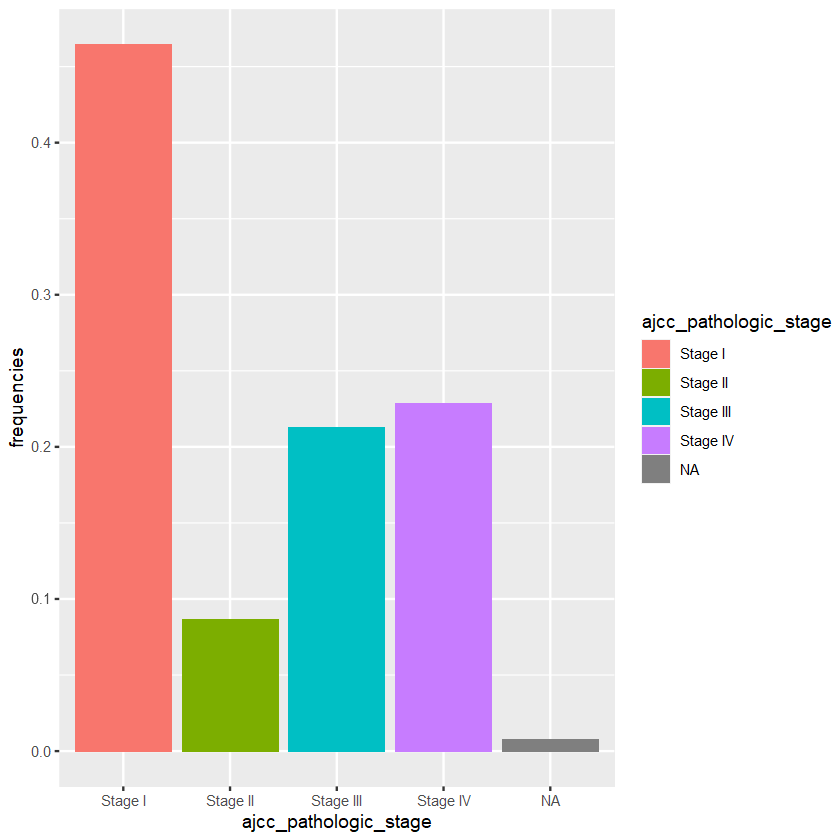

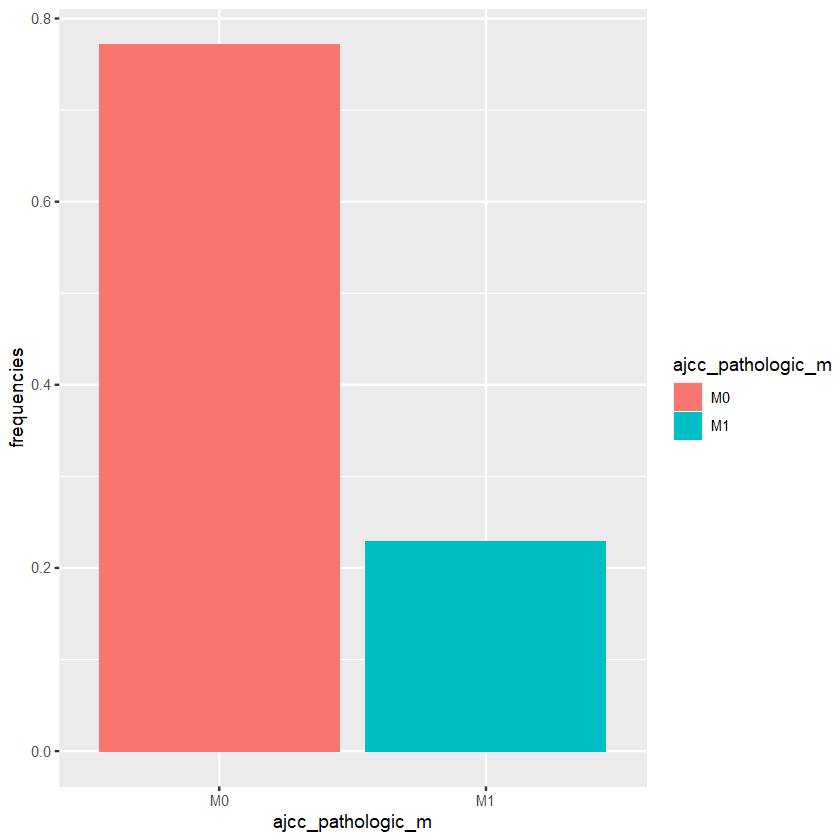

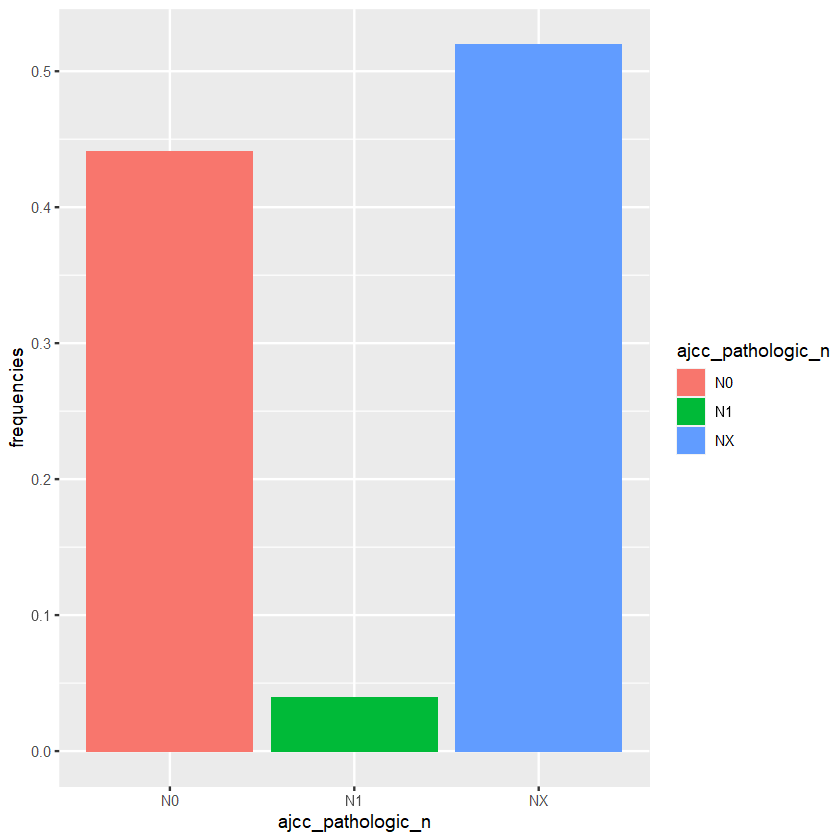

In [27]:
# visualize percentages of stages, metastasis categories and tumor spreading by lymph nodes n stages

ggplot(meta, aes(x = ajcc_pathologic_stage)) +  
    geom_bar(aes(y = (..count..)/sum(..count..), fill = ajcc_pathologic_stage))+
  ylab("frequencies") 

ggplot(meta, aes(x = ajcc_pathologic_m)) +  
    geom_bar(aes(y = (..count..)/sum(..count..), fill = ajcc_pathologic_m))+
  ylab("frequencies")
 

ggplot(meta, aes(x = ajcc_pathologic_n)) +  
    geom_bar(aes(y = (..count..)/sum(..count..), fill = ajcc_pathologic_n))+
  ylab("frequencies")

In [38]:
range(meta$age_at_index)

[1] 26 90

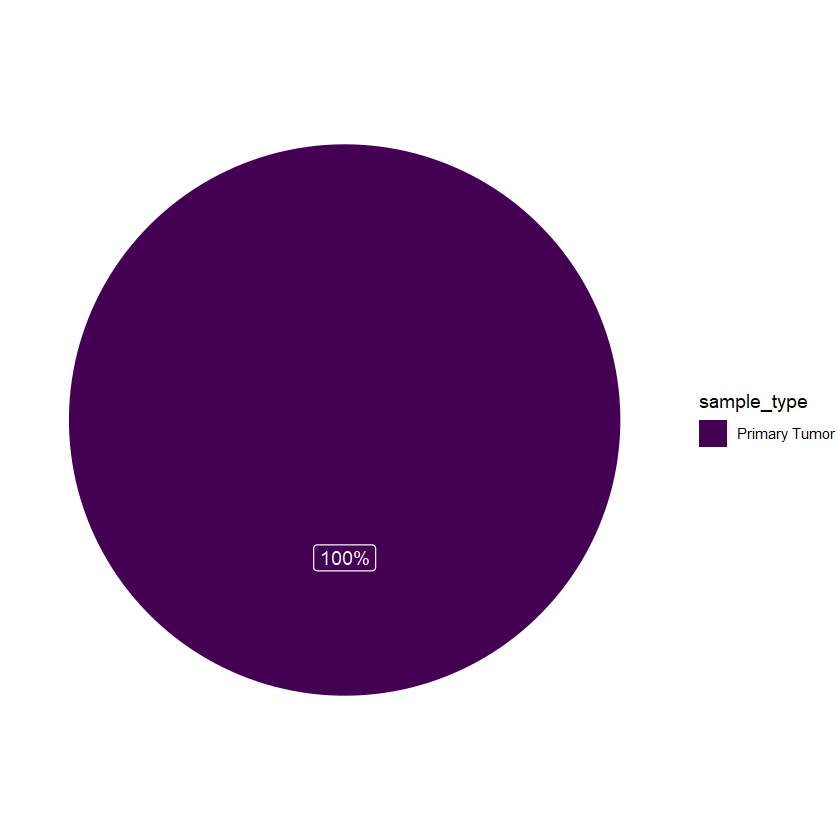

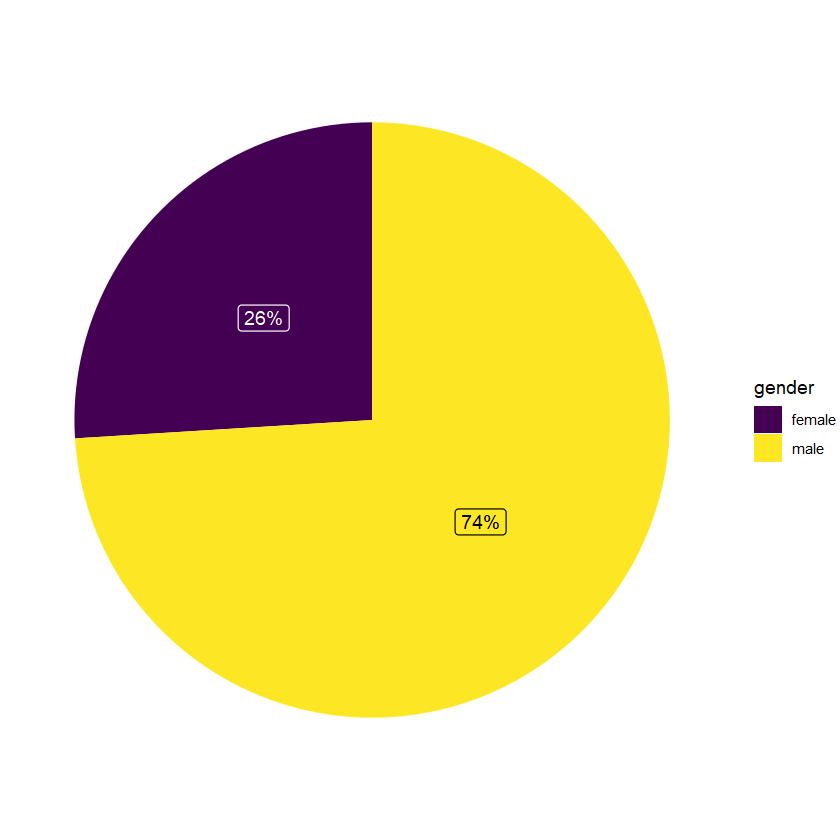

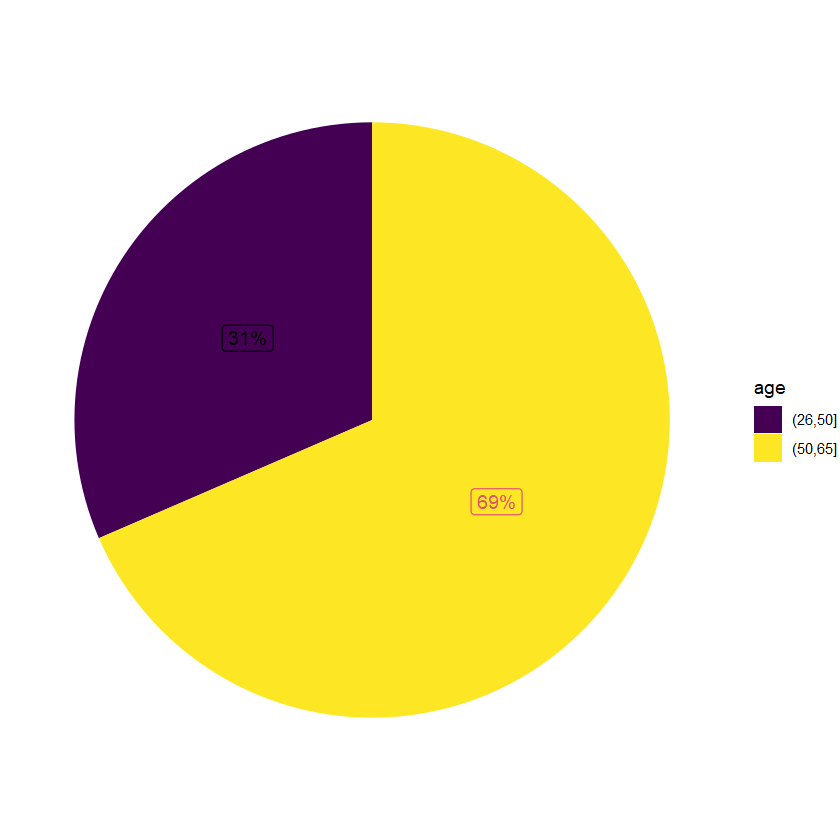

In [28]:
# visualize groups of sample type, gender and age ranges
df_type <- meta %>% 
  dplyr::group_by(sample_type) %>% # Variable to be transformed
  dplyr::count() %>% 
  dplyr::ungroup() %>% 
  dplyr::mutate(perc = `n` / sum(`n`)) %>% 
  dplyr::arrange(perc) %>%
  dplyr::mutate(labels = scales::percent(perc))

ggplot(df_type, aes(x = "", y = perc, fill = sample_type)) +
  geom_col() +
  geom_label(aes(label = labels), color = c("white"),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
  guides(fill = guide_legend(title = "sample_type")) +
  scale_fill_viridis_d() +
  coord_polar(theta = "y") + 
  theme_void()

df_gender <- meta %>% 
  dplyr::group_by(gender) %>% # Variable to be transformed
  dplyr::count() %>% 
  dplyr::ungroup() %>% 
  dplyr::mutate(perc = `n` / sum(`n`)) %>% 
  dplyr::arrange(perc) %>%
  dplyr::mutate(labels = scales::percent(perc))

ggplot(df_gender, aes(x = "", y = perc, fill = gender)) +
  geom_col() +
  geom_label(aes(label = labels), color = c("white", "black"),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
  guides(fill = guide_legend(title = "gender")) +
  scale_fill_viridis_d() +
  coord_polar(theta = "y") + 
  theme_void()


df_age <- meta %>% mutate(age_bins = cut(age_at_index, breaks=c(26, 50, 65, 90)))

df_age <- df_age %>% 
  dplyr::group_by(age_bins) %>% # Variable to be transformed
  dplyr::count() %>% 
  dplyr::ungroup() %>% 
  dplyr::mutate(perc = `n` / sum(`n`)) %>% 
  dplyr::arrange(perc) %>%
  dplyr::mutate(labels = scales::percent(perc))

ggplot(df_age, aes(x = "", y = perc, fill = age_bins)) +
  geom_col() +
  geom_label(aes(label = labels), color = factor(df_age$age_bins),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
  guides(fill = guide_legend(title = "age")) +
  scale_fill_viridis_d() +
  coord_polar(theta = "y") + 
  theme_void()

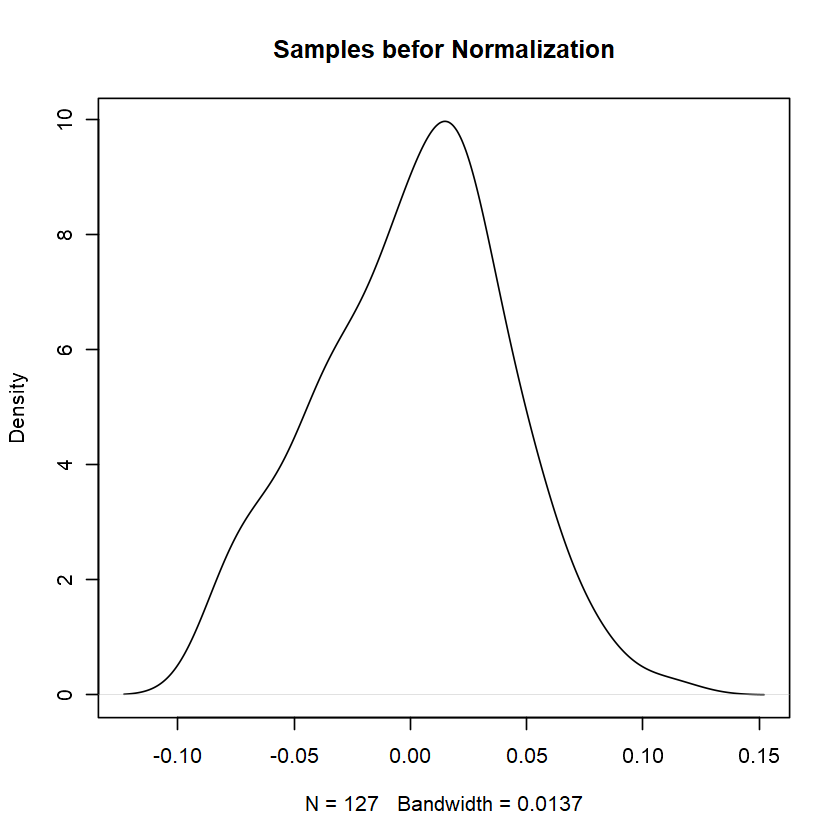

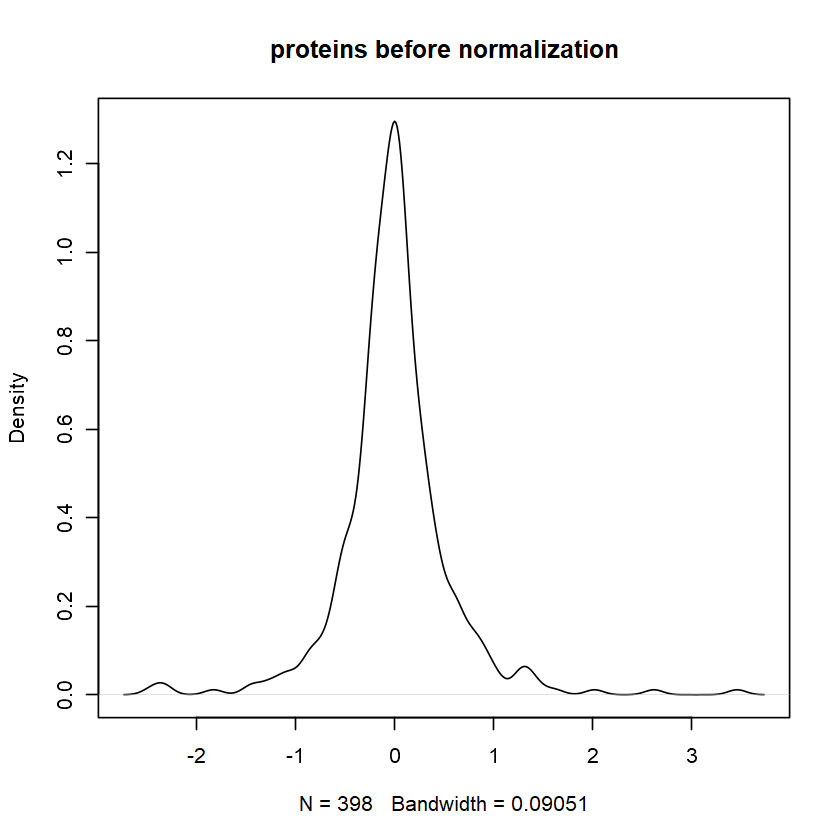

In [29]:
# distribution of samples and protein
plot(density(apply(prot_data3, 2, mean, na.rm = TRUE)),main='Samples befor Normalization')
plot(density(apply(t(prot_data3), 2, mean, na.rm = TRUE)),main='proteins before normalization')

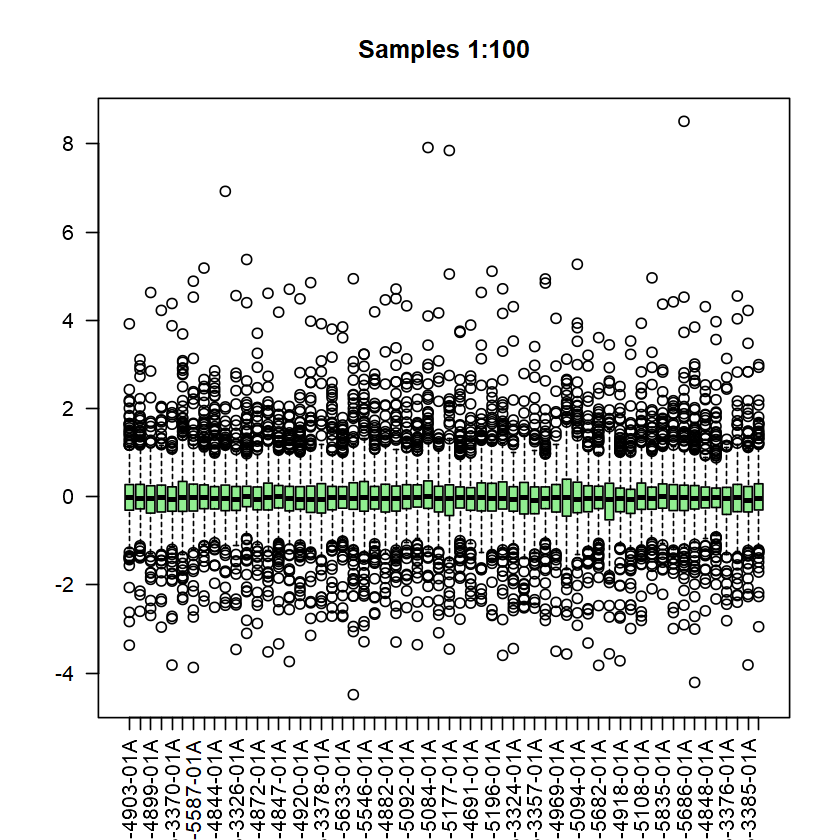

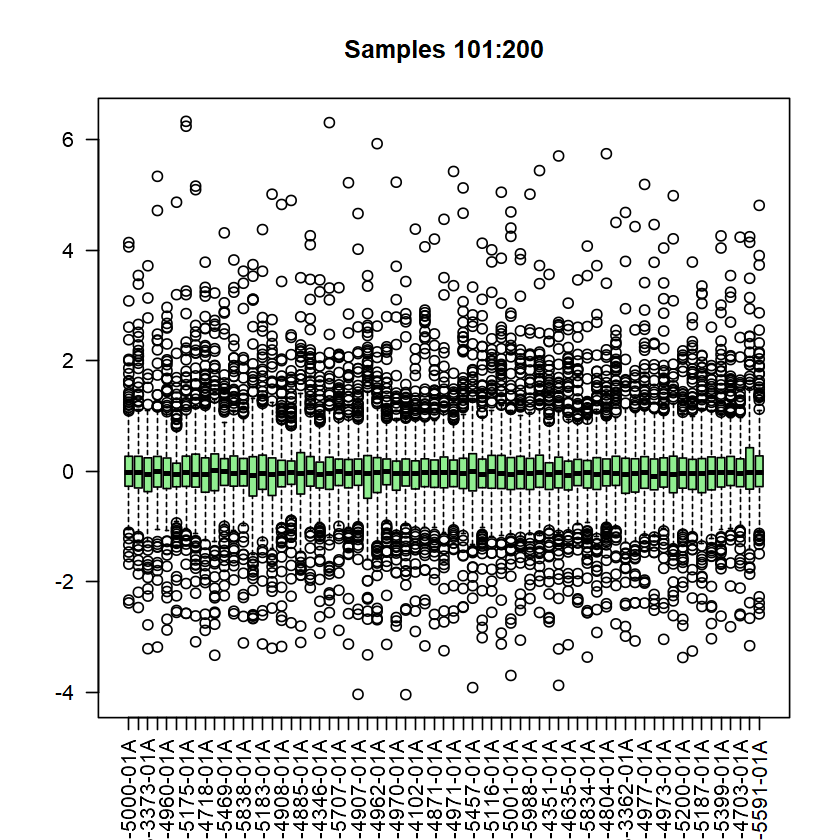

In [31]:
# boxplot of samples 
boxplot(prot_data3[,1:60], main="Samples 1:100", names=colnames(prot_data3)[1:60],las=2,
       col = "lightgreen")
boxplot(prot_data3[,61:127], main="Samples 101:200", names=colnames(prot_data3)[61:127],las=2,
       col = "lightgreen")

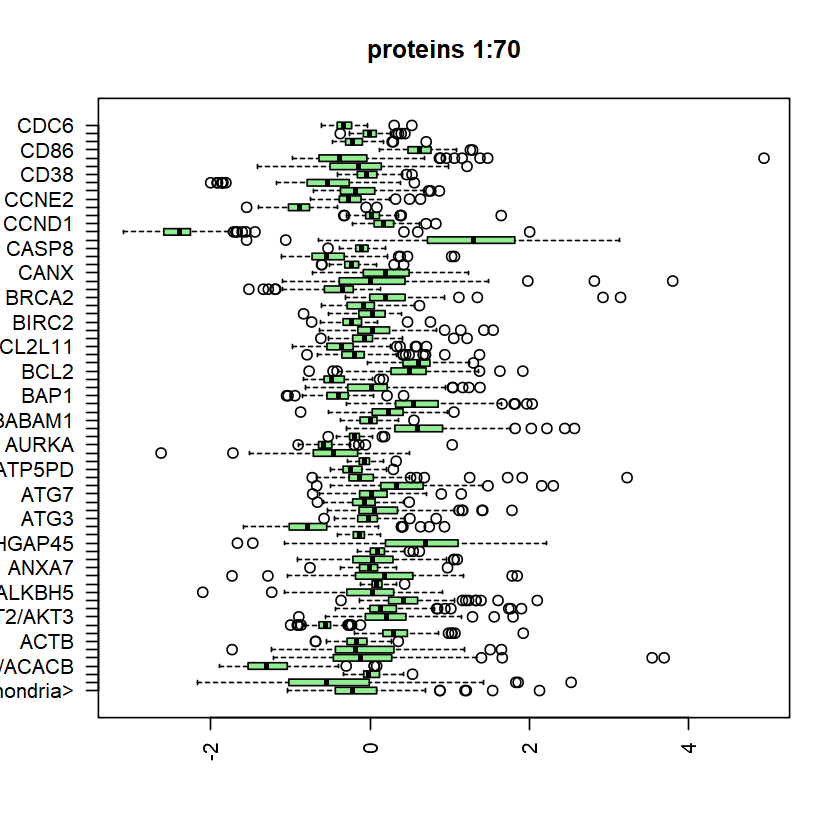

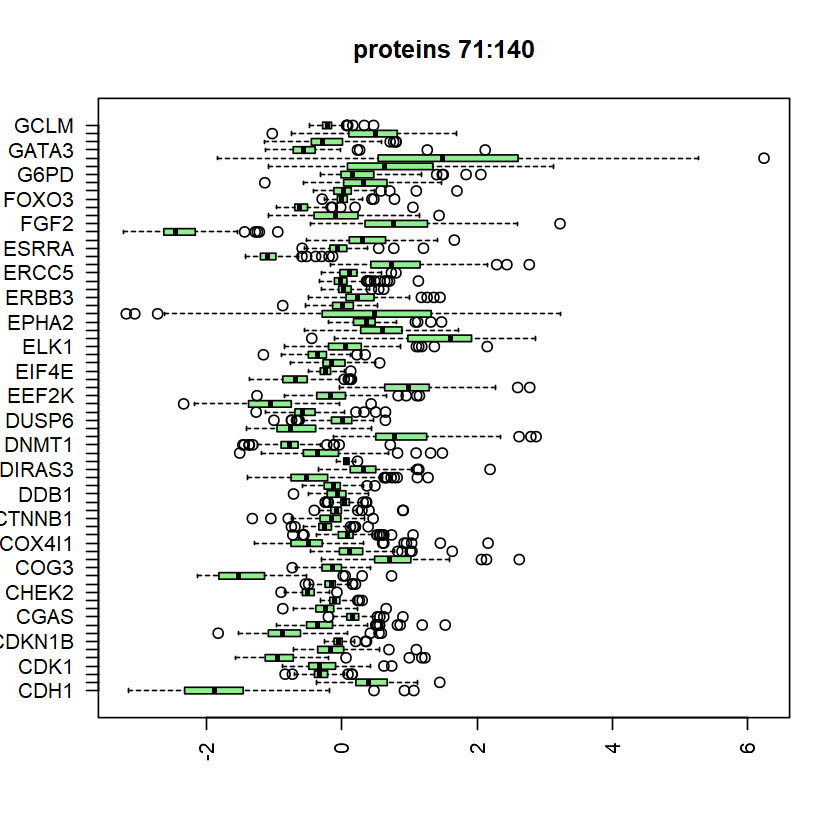

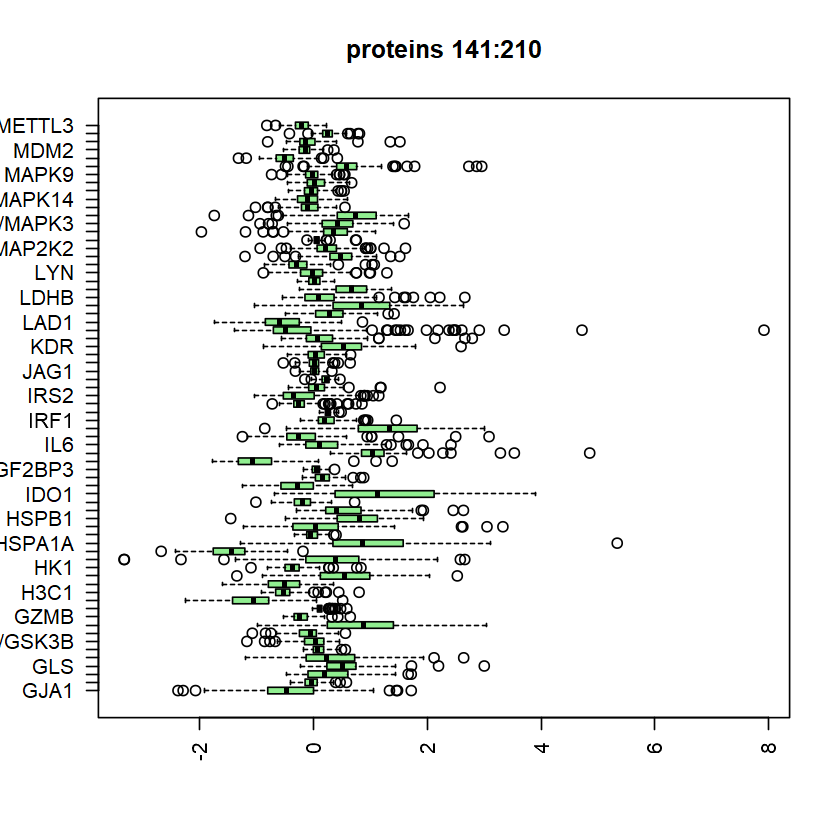

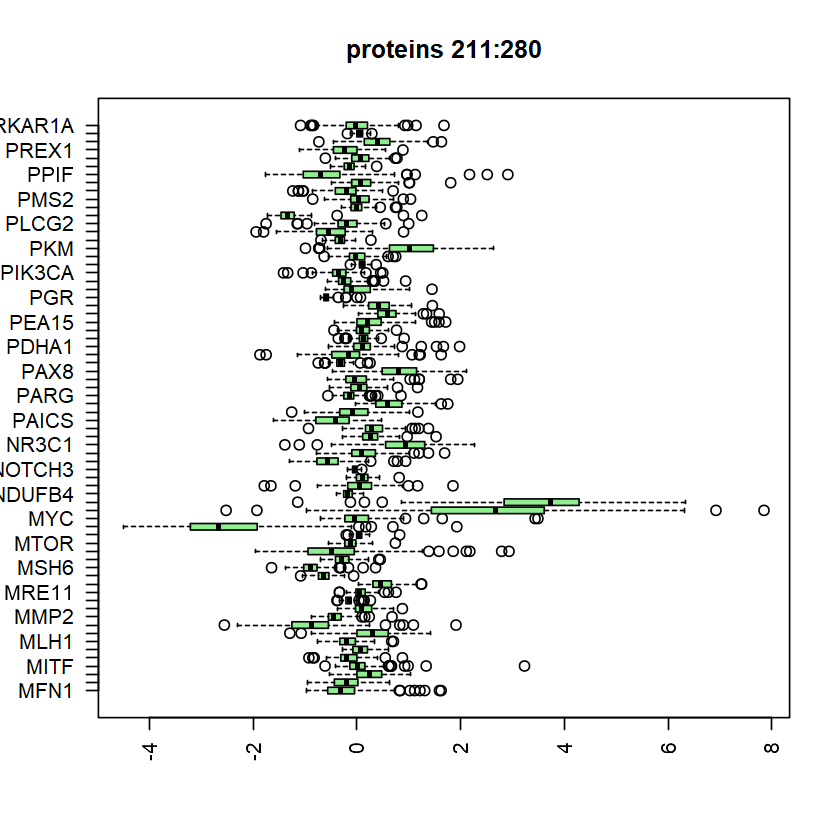

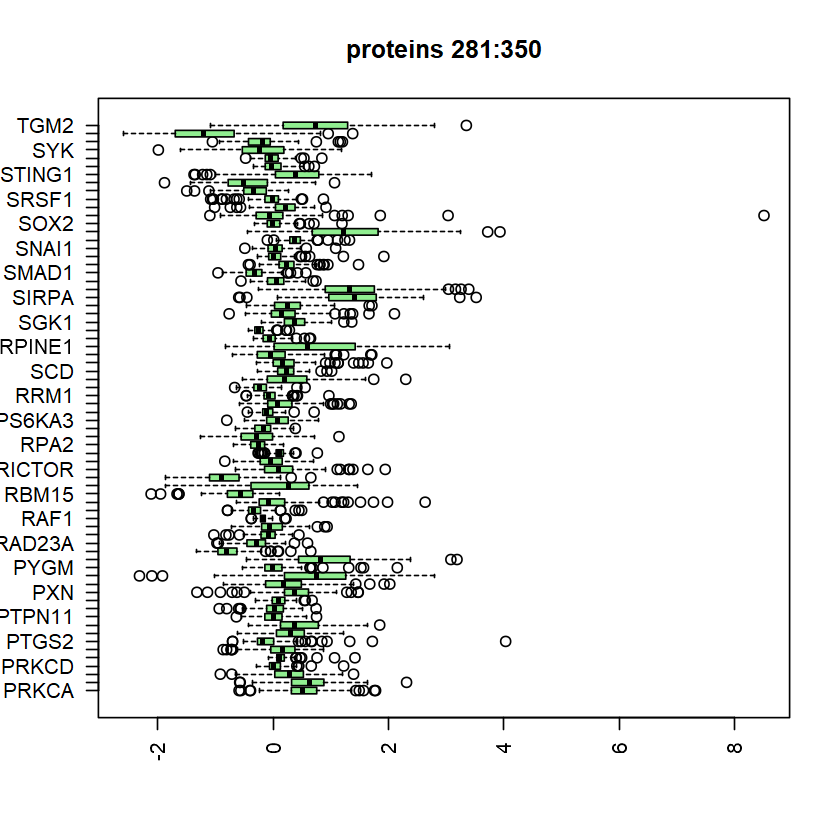

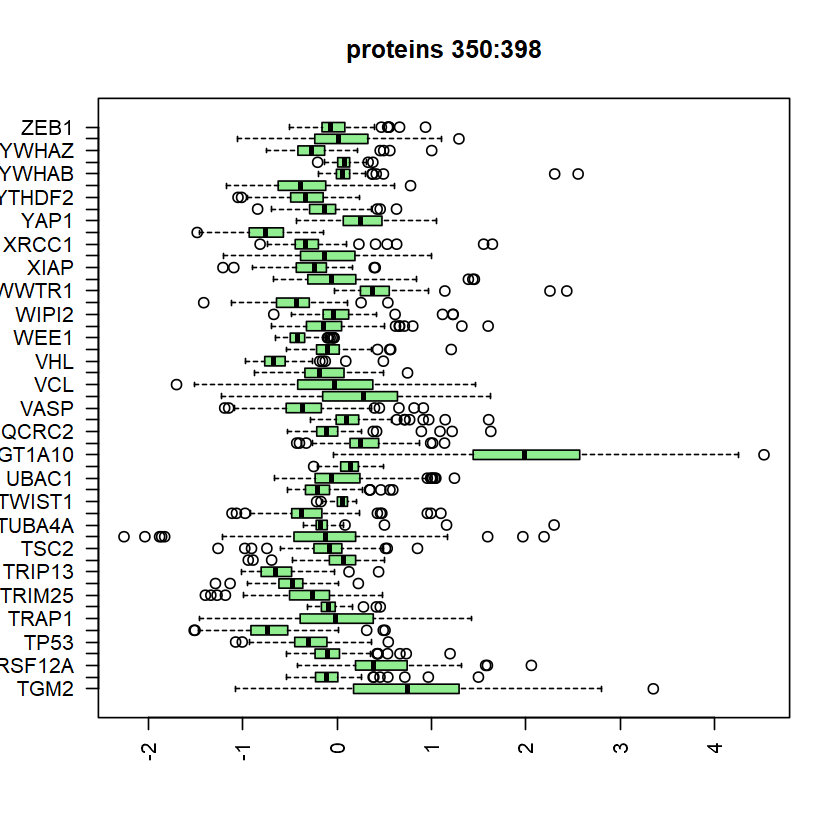

In [32]:
# boxplot of all proteins 
boxplot(t(prot_data3)[,1:70], main="proteins 1:70", horizontal=T, names=rownames(prot_data3)[1:70],las=2,
       col = "lightgreen")
boxplot(t(prot_data3)[,71:140], main="proteins 71:140", horizontal=T, names=rownames(prot_data3)[71:140],las=2,
       col = "lightgreen")
boxplot(t(prot_data3)[,141:210], main="proteins 141:210", horizontal=T, names=rownames(prot_data3)[141:210],las=2,
       col = "lightgreen")
boxplot(t(prot_data3)[,211:280], main="proteins 211:280", horizontal=T, names=rownames(prot_data3)[211:280],las=2,
       col = "lightgreen")
boxplot(t(prot_data3)[,281:350], main="proteins 281:350", horizontal=T, names=rownames(prot_data3)[281:350],las=2,
       col = "lightgreen")
boxplot(t(prot_data3)[,350:398], main="proteins 350:398", horizontal=T, names=rownames(prot_data3)[350:398],las=2,
       col = "lightgreen")

#### We have noticed that all data are normalized and scaled with zero mean so we wont perform normalization or scalling

In [33]:
# PCA of protein data
raw.pca <- prcomp(t(prot_data3))
summary(raw.pca)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     3.245 3.0793 2.25906 2.17543 1.88266 1.65443 1.5906
Proportion of Variance 0.142 0.1278 0.06879 0.06379 0.04778 0.03689 0.0341
Cumulative Proportion  0.142 0.2698 0.33857 0.40236 0.45013 0.48703 0.5211
                          PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     1.4642 1.41127 1.38999 1.2947 1.22370 1.20532 1.1459
Proportion of Variance 0.0289 0.02685 0.02604 0.0226 0.02018 0.01958 0.0177
Cumulative Proportion  0.5500 0.57688 0.60292 0.6255 0.64570 0.66528 0.6830
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     1.05443 1.03487 0.98742 0.96885 0.94786 0.91096 0.8949
Proportion of Variance 0.01499 0.01444 0.01314 0.01265 0.01211 0.01119 0.0108
Cumulative Proportion  0.69797 0.71240 0.72555 0.73820 0.75031 0.76149 0.7723
                          PC22    PC23    PC24    PC25   P

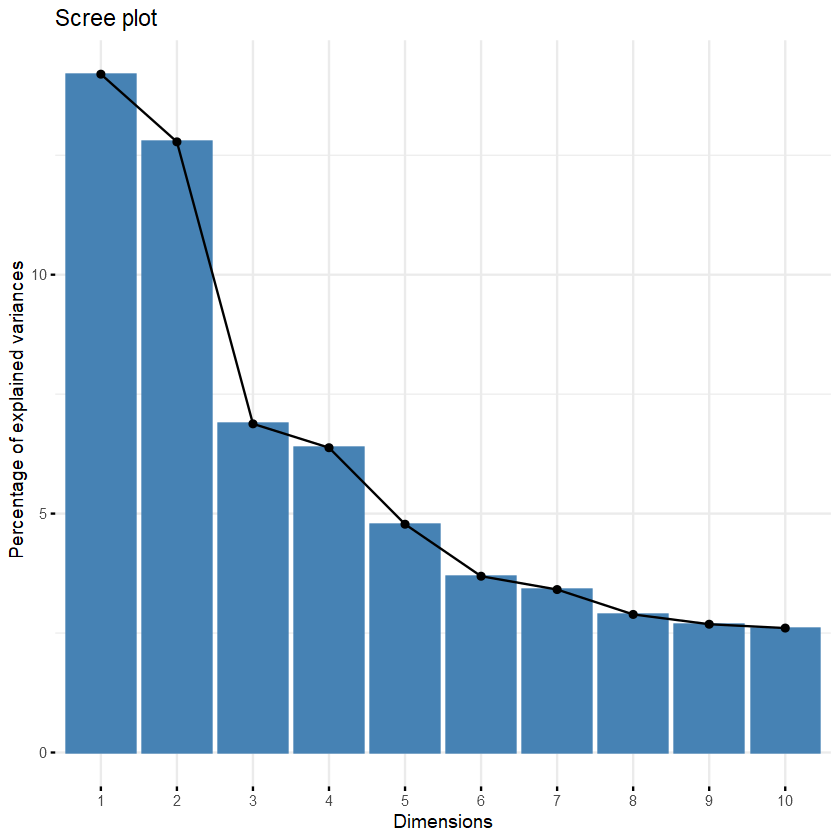

In [34]:
# visaulize pcs explained variance
fviz_eig(raw.pca, col.var="blue")

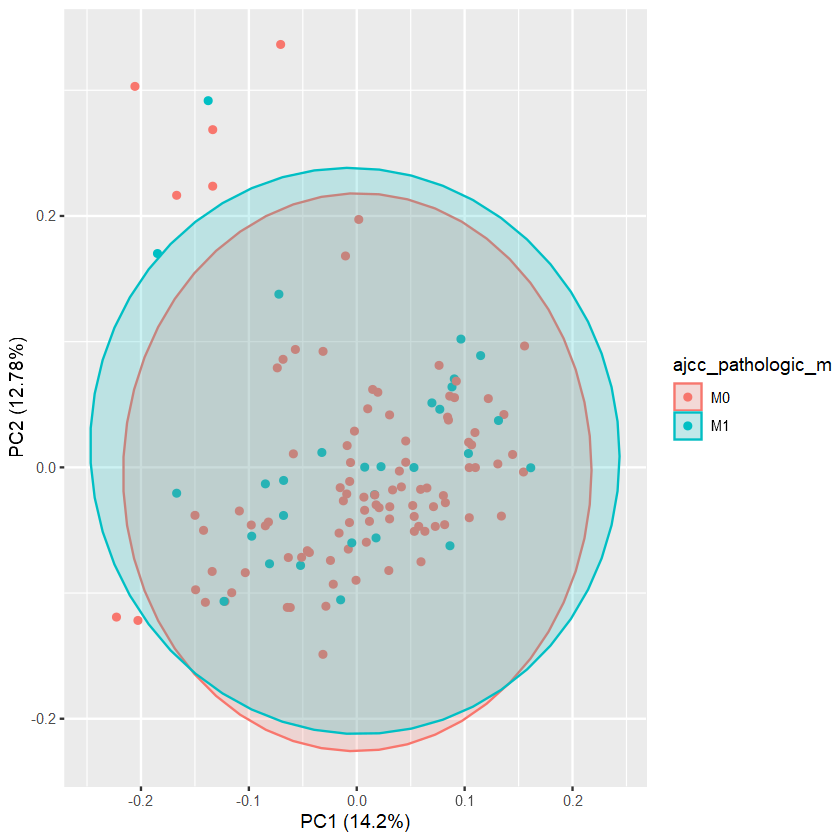

In [35]:
# PCA of data
autoplot(raw.pca, frame = TRUE, frame.type= "norm", data=meta, colour="ajcc_pathologic_m")


### 5- Data cleaning 

#### a- Remove zero variance genes

In [36]:
# estimate prtein expression variance
prot_var=apply(prot_data3, 1, var, na.rm = T)
prot_var

<mitochondria> 
                                             0.249751245 
                                      <poly(ADP-ribose)> 
                                             0.594896117 
                                                    ABL1 
                                             0.022680248 
                                             ACACA/ACACB 
                                             0.168201724 
                                                   ACSL1 
                                             0.524783125 
                                                   ACSS2 
                                             0.323429509 
                                                    ACTB 
                                             0.036464744 
                                                  ACVRL1 
                                             0.083974013 
                                                    ADAR 
                                             0.019346532 
                                          AKT1/AKT2/AKT3 
                                             0.183273927 
                                                  AKT1S1 
                                             0.136670135 
                                                    AKT2 
                                             0.127392794 
                                                  ALKBH5 
                                             0.207480214 
                                                  AMBRA1 
                                             0.009246991 
                                                   ANXA1 
                                             0.345310257 
                                                   ANXA7 
                                             0.038910115 
                                                      AR 
                                             0.178358492 
                                                    ARAF 
                                             0.020763317 
                                                ARHGAP45 
                                             0.575044509 
                                                  ARID1A 
                                             0.011187626 
                                                    ASNS 
                                             0.193824421 
                                                    ATG3 
                                             0.044946490 
                                                   ATG4B 
                                             0.169957746 
                                                    ATG5 
                                             0.054885756 
                                                    ATG7 
                                             0.086969682 
                                                     ATM 
                                             0.233571423 
                                                 ATP5F1A 
                                             0.223526792 
                                                  ATP5PD 
                                             0.030187907 
                                                     ATR 
                                             0.010763409 
                                                    ATRX 
                                             0.226434587 
                                                   AURKA 
                                             0.039898576 
                                       AURKA/AURKB/AURKC 
                                             0.012502331 
                                                   AURKB 
                                             0.300530969 
                                                  BABAM1 
                                             0.027238846 
                                                     BAD 
                                        

In [37]:
# See zero variance protein if present we will remove them
zeroVarprot <- (prot_var == 0 | is.na(prot_var))
sum(zeroVarprot)

[1] 0

#### b- Remove highly correlated proteins >0.99 if present 

In [38]:
# correlation of proteins
cor_matrix <- cor(t(prot_data3))                      # Correlation matrix
cor_matrix

,<mitochondria>,<poly(ADP-ribose)>,ABL1,ACACA/ACACB,ACSL1,ACSS2,ACTB,ACVRL1,ADAR,AKT1/AKT2/AKT3,⋯,XRCC5,YAP1,YBX1,YTHDF2,YTHDF3,YWHAB,YWHAE,YWHAZ,ZAP70,ZEB1
<mitochondria>,1.00000000,0.139666640,-0.165917656,0.403216466,0.616633808,0.316267036,-0.052899427,0.547943577,0.02269021,-0.163097381,⋯,-0.012640713,-0.281077371,-0.11846765,-0.110630797,8.211401e-02,0.20360533,0.001536401,0.13060328,-0.167685672,-0.24101157
<poly(ADP-ribose)>,0.13966664,1.000000000,-0.194633723,0.169803738,0.009785140,0.127853271,-0.128965290,0.004543805,0.08953062,0.162969923,⋯,0.172547236,0.104694586,0.23579002,0.139567354,1.450256e-01,-0.01153532,0.003565510,0.06080915,-0.340925649,-0.12745350
ABL1,-0.16591766,-0.194633723,1.000000000,-0.165658323,-0.091807998,-0.347785023,0.128956932,-0.007532216,-0.32546647,-0.025702471,⋯,-0.216832978,0.125983272,-0.03111275,-0.559381011,-5.573097e-01,0.22526650,0.474283018,-0.23248268,-0.269005433,0.74133580
ACACA/ACACB,0.40321647,0.169803738,-0.165658323,1.000000000,0.233453803,0.501650611,0.162299995,0.066875912,0.08711568,-0.163947757,⋯,0.091987951,0.016941018,0.16120178,0.202842877,2.834582e-01,0.17028178,0.049641885,0.41292181,-0.001351442,-0.30664643
ACSL1,0.61663381,0.009785140,-0.091807998,0.233453803,1.000000000,0.398293914,-0.182537671,0.495383169,-0.02781986,-0.161601254,⋯,-0.119718198,-0.357341254,-0.36759110,0.034633691,1.880025e-01,0.12560395,0.106769175,0.05820297,-0.211191875,-0.22716302
ACSS2,0.31626704,0.127853271,-0.347785023,0.501650611,0.398293914,1.000000000,0.052772971,0.095844895,0.22662590,-0.142067108,⋯,0.020936823,-0.166548505,-0.12915728,0.348358468,3.048532e-01,0.04683354,-0.021279356,0.27247710,0.059186017,-0.46619525
ACTB,-0.05289943,-0.128965290,0.128956932,0.162299995,-0.182537671,0.052772971,1.000000000,-0.377263530,0.12166635,-0.003511150,⋯,0.198459852,0.407480794,0.35885793,0.070790821,9.323609e-02,0.06262813,0.061660945,0.26508633,0.338572643,0.17510582
ACVRL1,0.54794358,0.004543805,-0.007532216,0.066875912,0.495383169,0.095844895,-0.377263530,1.000000000,-0.23436551,-0.187381332,⋯,-0.231460480,-0.415316731,-0.38957619,-0.228913275,-1.481763e-01,0.12382008,-0.065312793,-0.15862334,-0.316432241,-0.05111418
ADAR,0.02269021,0.089530620,-0.325466470,0.087115683,-0.027819856,0.226625900,0.121666353,-0.234365512,1.00000000,-0.078994119,⋯,0.345883109,0.114730934,0.22474237,0.439087748,4.067574e-01,0.07059199,-0.197742604,0.18880551,0.312355966,-0.23594011
AKT1/AKT2/AKT3,-0.16309738,0.162969923,-0.025702471,-0.163947757,-0.161601254,-0.142067108,-0.003511150,-0.187381332,-0.07899412,1.000000000,⋯,0.056683149,-0.045067826,0.27890900,0.002216091,-2.490621e-02,-0.16552693,-0.082785089,-0.15976068,-0.017208276,-0.02177289


In [39]:
# make the upper triange values with zero to avoid duplication
cor_matrix_rm <- cor_matrix    # Modify correlation matrix
cor_matrix_rm[upper.tri(cor_matrix_rm)] = 0
diag(cor_matrix_rm) = 0
cor_matrix_rm

,<mitochondria>,<poly(ADP-ribose)>,ABL1,ACACA/ACACB,ACSL1,ACSS2,ACTB,ACVRL1,ADAR,AKT1/AKT2/AKT3,⋯,XRCC5,YAP1,YBX1,YTHDF2,YTHDF3,YWHAB,YWHAE,YWHAZ,ZAP70,ZEB1
<mitochondria>,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
<poly(ADP-ribose)>,0.13966664,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
ABL1,-0.16591766,-0.194633723,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
ACACA/ACACB,0.40321647,0.169803738,-0.165658323,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
ACSL1,0.61663381,0.009785140,-0.091807998,0.233453803,0.000000000,0.000000000,0.000000000,0.00000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
ACSS2,0.31626704,0.127853271,-0.347785023,0.501650611,0.398293914,0.000000000,0.000000000,0.00000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
ACTB,-0.05289943,-0.128965290,0.128956932,0.162299995,-0.182537671,0.052772971,0.000000000,0.00000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
ACVRL1,0.54794358,0.004543805,-0.007532216,0.066875912,0.495383169,0.095844895,-0.377263530,0.00000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
ADAR,0.02269021,0.089530620,-0.325466470,0.087115683,-0.027819856,0.226625900,0.121666353,-0.23436551,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
AKT1/AKT2/AKT3,-0.16309738,0.162969923,-0.025702471,-0.163947757,-0.161601254,-0.142067108,-0.003511150,-0.18738133,-0.07899412,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0


In [40]:
# remove high correlated proteins if present
prot_new <- prot_data3[!apply(cor_matrix_rm, 2, function(x) any(x > 0.99)),]
dim(prot_new) 
head(prot_new)   

[1] 398 127

,TCGA-CJ-4903-01A,TCGA-CZ-5460-01A,TCGA-CJ-4899-01A,TCGA-CJ-5671-01A,TCGA-A3-3370-01A,TCGA-B0-5117-01A,TCGA-CW-5587-01A,TCGA-CZ-5455-01A,TCGA-B0-4844-01A,TCGA-B0-4819-01A,⋯,TCGA-B8-5552-01B,TCGA-BP-5200-01A,TCGA-CJ-4901-01A,TCGA-BP-5187-01A,TCGA-B0-5080-01A,TCGA-B0-5399-01A,TCGA-CJ-4887-01A,TCGA-B0-4703-01A,TCGA-CJ-4888-01A,TCGA-CW-5591-01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<mitochondria>,0.0447540,0.8755300,-0.89491000,-0.31250000,-0.1117300,1.5362000,-0.1343700,-0.29737000,-0.14554000,-0.1656500,⋯,-0.80472000,-0.350480000,0.50356000,-0.38183000,-0.9480100,-0.2387100,-0.0156970,-0.51024000,0.2292100,0.0795720
<poly(ADP-ribose)>,0.3698676,1.8269130,-1.28614700,-1.31154900,-0.6435293,-1.5127480,-1.1770630,-0.68127780,0.34039230,-0.0956230,⋯,-1.42909500,-0.679176100,-0.78952950,-0.54734430,-1.0859050,-1.4833950,-0.7750149,-0.46932520,-1.1433370,0.4022528
ABL1,0.0369333,-0.1409238,0.04160705,0.07445545,0.2000987,-0.0884983,-0.1773350,-0.06471265,-0.08097945,0.2374914,⋯,0.03259774,0.000327615,-0.04929480,-0.03699439,0.1482438,-0.1332385,-0.1545303,0.02702943,0.2782263,-0.2068595
ACACA/ACACB,-1.3852000,-1.1668250,-1.82560000,-1.44335000,-1.5834000,0.0807100,-1.5434500,-1.22903500,-1.04590000,-0.5132200,⋯,-1.68100000,-1.604350000,-1.00701500,-1.19286500,-1.2065000,-1.2778300,-0.8516350,-1.27455000,-1.0806050,-1.1808500
ACSL1,-0.1665653,1.0245450,-0.79976370,-0.57648750,0.2778158,3.6885680,0.2043283,0.37181510,0.20122280,-0.6061651,⋯,-0.63788130,-0.748795700,-0.06705106,-0.71423180,-1.1582560,0.7836552,0.8293822,-0.68756830,-0.3529034,0.2610270
ACSS2,0.4728934,0.5960041,-0.90949030,-0.75491600,-0.2494957,0.8198977,-0.1621370,0.01855246,-0.07668701,-0.4036535,⋯,-0.49465590,-0.551530800,0.04365537,-0.41136010,-0.7729209,0.6551191,0.6187014,-0.69181930,-0.6428162,0.8152788


In [41]:
# see how many high correlated preteins
sum(apply(cor_matrix_rm, 2, function(x) any(x > 0.99)))
rownames(cor_matrix_rm)[apply(cor_matrix_rm, 2, function(x) any(x > 0.99))]

[1] 0

character(0)

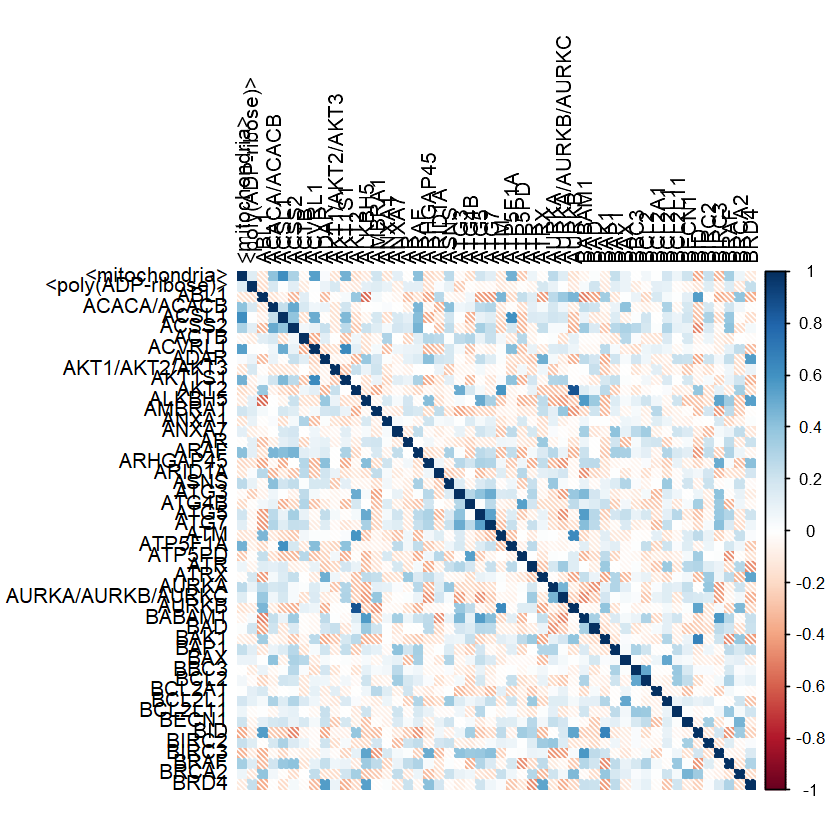

In [42]:
corrplot(cor_matrix[1:50,1:50],        # Correlation matrix
         method = "shade", # Correlation plot method
         type = "full",    # Correlation plot style (also "upper" and "lower")
         diag = TRUE,      # If TRUE (default), adds the diagonal
         tl.col = "black", # Labels color
         bg = "white",     # Background color
         title = "",       # Main title
         col = NULL)       # Color palette

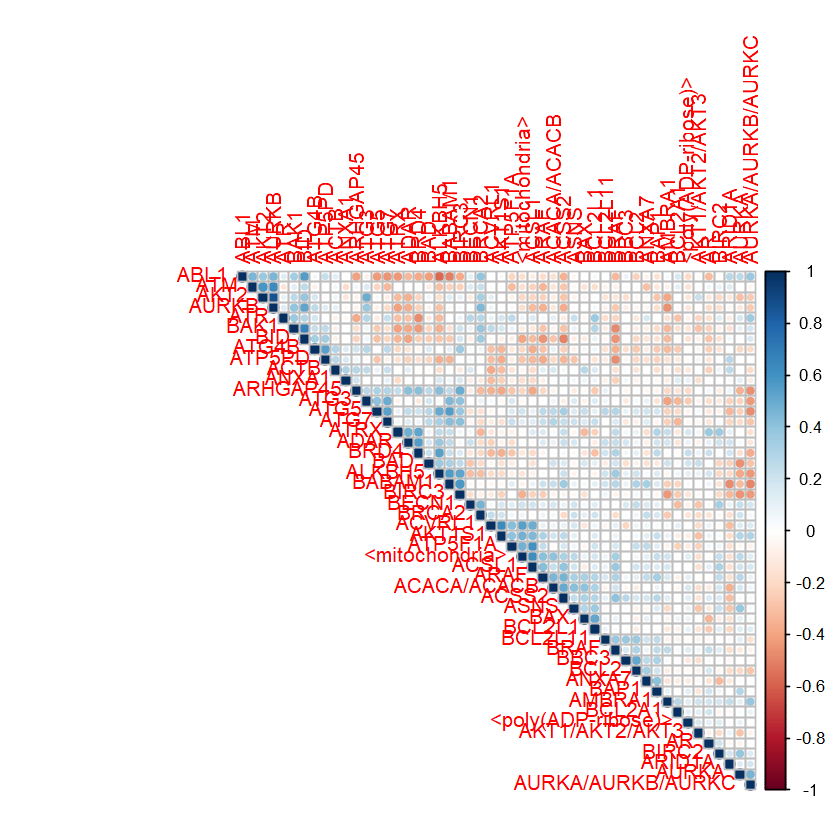

In [43]:
# correlation plot
corrplot(cor_matrix[1:50,1:50], type="upper", order="hclust" )


#### c- Remove mitochondria and polyADP from rownames and replace long rownames

In [44]:
#### c- Remove mitochondria and polyADP from rownames
prot_data3 <- prot_data3[3:dim(prot_data3)[1],]
dim(prot_data3)

[1] 396 127

In [45]:
# replace long rownames 
rownames(prot_data3) = gsub("UGT1A1/UGT1A3/UGT1A4/UGT1A5/UGT1A7/UGT1A8/UGT1A9/UGT1A10", "UGT1A", rownames(prot_data3))

### 6-Visualize the data by Kmeans clustering

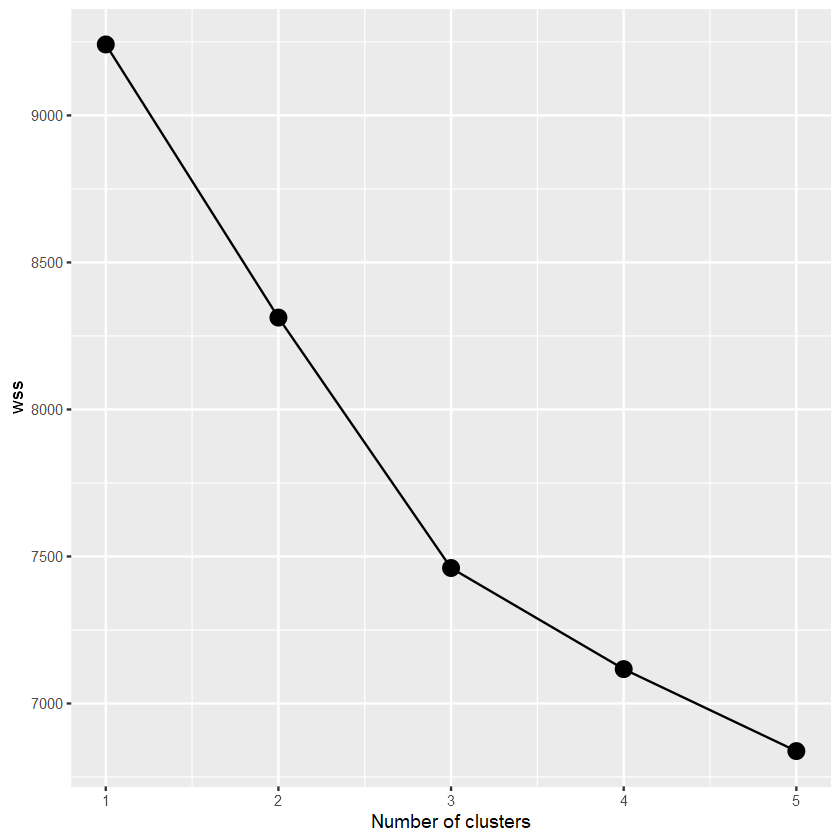

In [46]:
# Decide how many clusters to look at
n_clusters <- 5

# Initialize total within sum of squares error: wss
wss <- numeric(n_clusters)

set.seed(123)

# Look over 1 to n possible clusters
for (i in 1:n_clusters) {
  # Fit the model: km.out
  km.out <- kmeans(t(prot_data3), centers = i, nstart = 5)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
wss_df <- tibble(clusters = 1:n_clusters, wss = wss)
 
scree_plot <- ggplot(wss_df, aes(x = clusters, y = wss, group = 1)) +
    geom_point(size = 4)+
    geom_line() +
    scale_x_continuous(breaks = c(1, 2, 3, 4, 5)) +
    xlab('Number of clusters')
scree_plot

In [47]:
# kmeans clustering using k=2
km2 <- kmeans(t(prot_data3), centers = 2, nstart = 15)

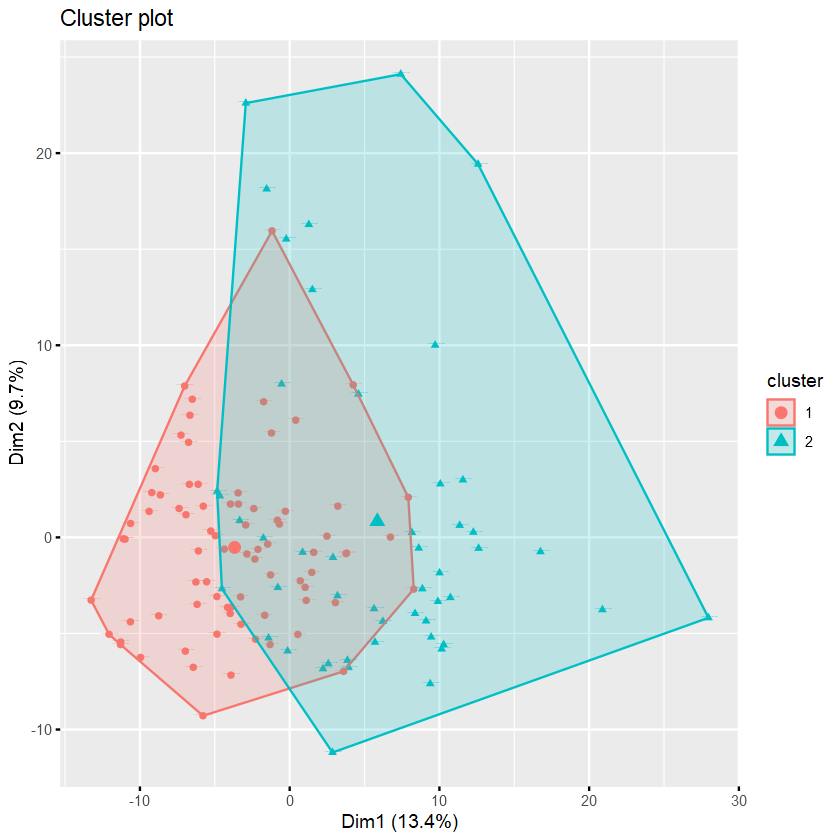

In [48]:
# visualize clustering with k=2
fviz_cluster(km2, data = t(prot_data3), ellipse = T, labelsize = 1 )


In [49]:
# kmeans clustering using k=3
km3 <- kmeans(t(prot_data3), centers = 3, nstart = 15)

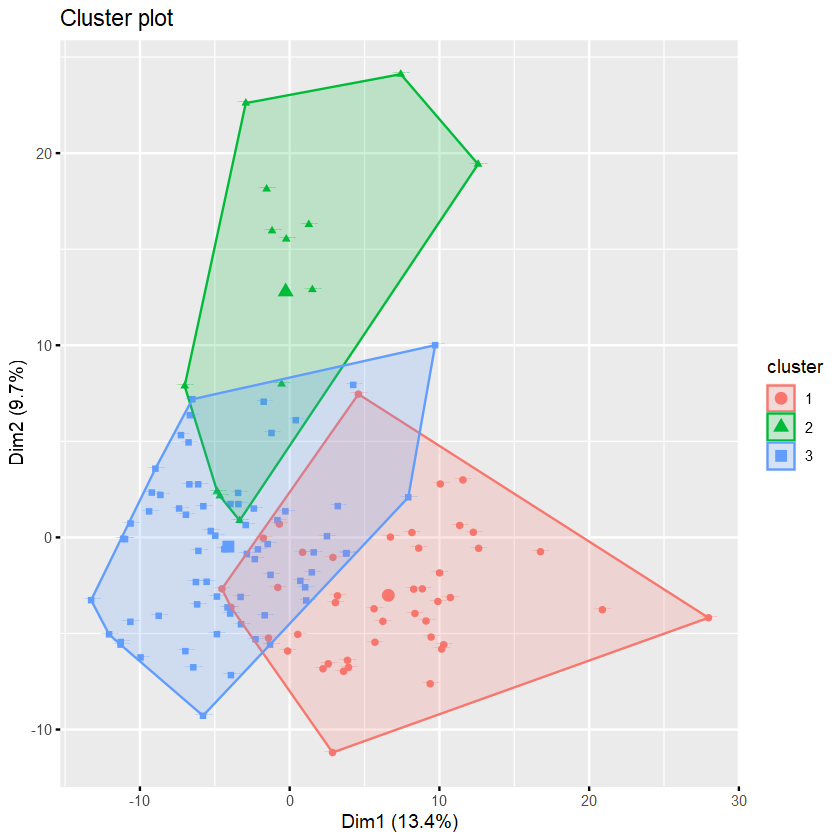

In [50]:
# visualize clustering with k=3
fviz_cluster(km3, data = t(prot_data3), ellipse = T, labelsize = 1 )

### 7- Differential analysis using limma

In [51]:
# make the design by metastasis feature that will be used for differential analysis in limma
metastasis = factor(meta$ajcc_pathologic_m)
design <- model.matrix(~0+metastasis)
colnames(design) <- gsub("metastasis", "", colnames(design))
design

,M0,M1
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,0,1
10,0,1


In [52]:
# make the contrast between m0 and m1
contrast<-makeContrasts(M0-M1,levels=design) 


In [53]:
# fitting of the limma linear model
fit <- lmFit(as.matrix(prot_data3), design)
fit2 <- contrasts.fit(fit, contrast)
fit2 <- eBayes(fit2)

In [54]:
# get the res object from the limma model
res_prot=topTable(fit2, adjust.method='fdr', number=999999999,p.value=1,coef = 1)
dim(res_prot)
head(res_prot)
tail(res_prot)

[1] 396   6

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CDK1/CDK2/CDK3,-0.4039638,-0.8784423,-4.799071,4.387690e-06,0.001737525,3.9465604
PECAM1,0.2134182,0.6051846,4.026476,9.664892e-05,0.019136485,1.1980795
YTHDF3,-0.2626378,-0.3532737,-3.557371,5.269373e-04,0.052323725,-0.2922824
BRD4,-0.2320901,-0.4262712,-3.556503,5.285225e-04,0.052323725,-0.2949060
WTAP,-0.1741440,-0.4562132,-3.113313,2.285186e-03,0.156026138,-1.5645714
MCL1,-0.1801818,-0.4840610,-3.102517,2.364032e-03,0.156026138,-1.5937344


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GATA3,0.0028781643,-0.5175939,0.035510801,0.9717280,0.9841542,-5.942943
ARID1A,0.0006359984,-0.1440042,0.027314497,0.9782517,0.9880784,-5.943185
FASN,-0.0021101020,-2.3547283,-0.024373423,0.9805929,0.9880784,-5.943256
PYGL,-0.0033442255,0.6939822,-0.018745534,0.9850734,0.9900738,-5.943370
NRG1,0.0003119489,0.3267619,0.004845326,0.9961416,0.9964356,-5.943525
ERCC5,-0.0001896925,0.1147126,-0.004476098,0.9964356,0.9964356,-5.943526


In [58]:
# how many significat DE protein by the cutoff adjpval<0.05 and logfchange<0 or >0
res_prot  %>%filter(P.Value < 0.05 & abs(logFC) >0) %>% dim  

[1] 58  6

In [59]:
res_prot  %>%filter(P.Value < 0.05 & abs(logFC) >0.0) 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CDK1/CDK2/CDK3,-0.40396378,-0.878442255,-4.799071,4.387690e-06,0.001737525,3.9465604
PECAM1,0.21341821,0.605184575,4.026476,9.664892e-05,0.019136485,1.1980795
YTHDF3,-0.26263775,-0.353273704,-3.557371,5.269373e-04,0.052323725,-0.2922824
BRD4,-0.23209007,-0.426271238,-3.556503,5.285225e-04,0.052323725,-0.2949060
WTAP,-0.17414398,-0.456213222,-3.113313,2.285186e-03,0.156026138,-1.5645714
MCL1,-0.18018176,-0.484061031,-3.102517,2.364032e-03,0.156026138,-1.5937344
DLAT,0.04146357,0.069374192,2.982199,3.430389e-03,0.194062034,-1.9128969
FRS2,0.15864871,0.034916873,2.921179,4.126521e-03,0.197445985,-2.0706152
DDR1,0.11189416,-0.120444766,2.888560,4.549747e-03,0.197445985,-2.1537675


In [60]:
# DE protein by the cutoff
prot_degs <- res_prot %>% filter(P.Value < 0.05 & abs(logFC) >0) 
dim(prot_degs)
head(prot_degs)

[1] 58  6

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CDK1/CDK2/CDK3,-0.4039638,-0.8784423,-4.799071,4.387690e-06,0.001737525,3.9465604
PECAM1,0.2134182,0.6051846,4.026476,9.664892e-05,0.019136485,1.1980795
YTHDF3,-0.2626378,-0.3532737,-3.557371,5.269373e-04,0.052323725,-0.2922824
BRD4,-0.2320901,-0.4262712,-3.556503,5.285225e-04,0.052323725,-0.2949060
WTAP,-0.1741440,-0.4562132,-3.113313,2.285186e-03,0.156026138,-1.5645714
MCL1,-0.1801818,-0.4840610,-3.102517,2.364032e-03,0.156026138,-1.5937344


### Visualize the DE proteins

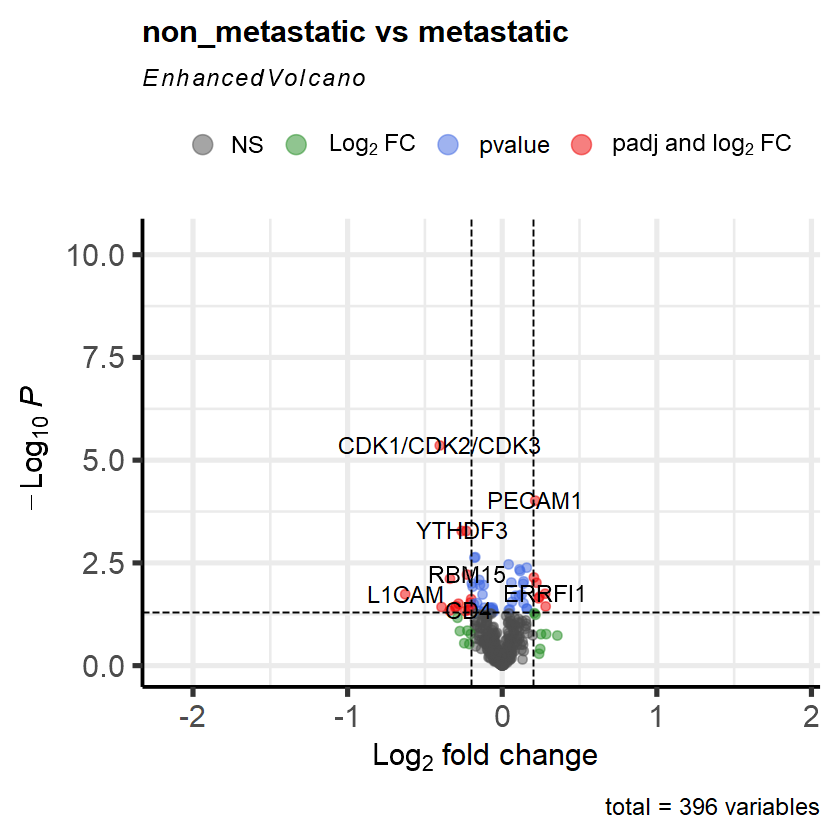

In [61]:
# Volcano plot of DE proteins
EnhancedVolcano(res_prot,
                lab = rownames(res_prot),
                x = 'logFC',
                y = 'P.Value',
                FCcutoff = 0.2,
                pCutoff = 0.05,
                title = "non_metastatic vs metastatic",
                legendLabels = c("NS", expression(Log[2] ~ FC), "pvalue", expression(padj ~ and
                                                                                   ~ log[2] ~ FC))
)



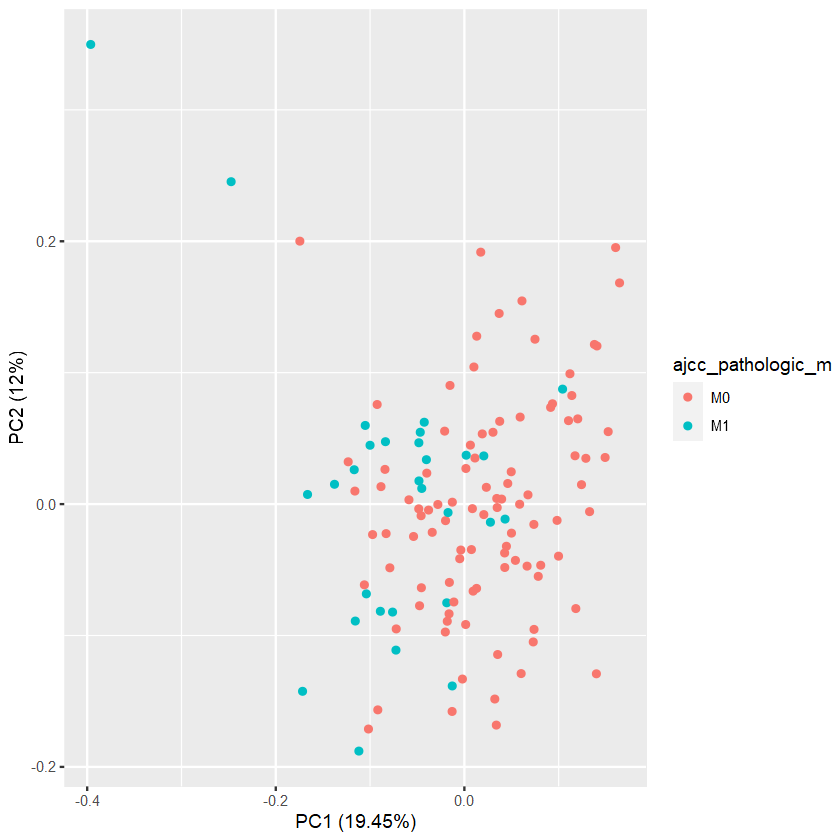

In [62]:
# PCA of DE proteins
pca <- prcomp(t(prot_data3[rownames(prot_degs),]), scale.=T)
autoplot(pca, data = meta, colour = 'ajcc_pathologic_m')

In [63]:
# DE protein expression
prot_exp_final_degs <- prot_data3[rownames(prot_degs),]
dim(prot_exp_final_degs)

[1]  58 127

### 8- Save the protein data and DE preoteins

In [64]:
write.csv(prot_data3, "prot_exp_final_all.csv")

In [65]:
write.csv(prot_exp_final_degs, "prot_exp_final_degs.csv")

In [66]:
write.csv(res_prot, "prot_res.csv")

In [67]:
write.csv(prot_degs, "prot_degs.csv")